In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import src.util as util
from src.p01b_logreg import LogisticRegression
from src.p01e_gda import GDA
from src.p03d_poisson import PoissonRegression

import seaborn as sns

from sklearn.metrics import accuracy_score

from pythetatools.config_visualisation import t2k_style
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.style.use(t2k_style)

%load_ext autoreload
%autoreload 2

## Problem 1

In [2]:
ds1_train = pd.read_csv("data/ds1_train.csv")
ds1_valid = pd.read_csv("data/ds1_valid.csv")
ds2_train = pd.read_csv("data/ds2_train.csv")
ds2_valid = pd.read_csv("data/ds2_valid.csv")

Accuracy=0.915


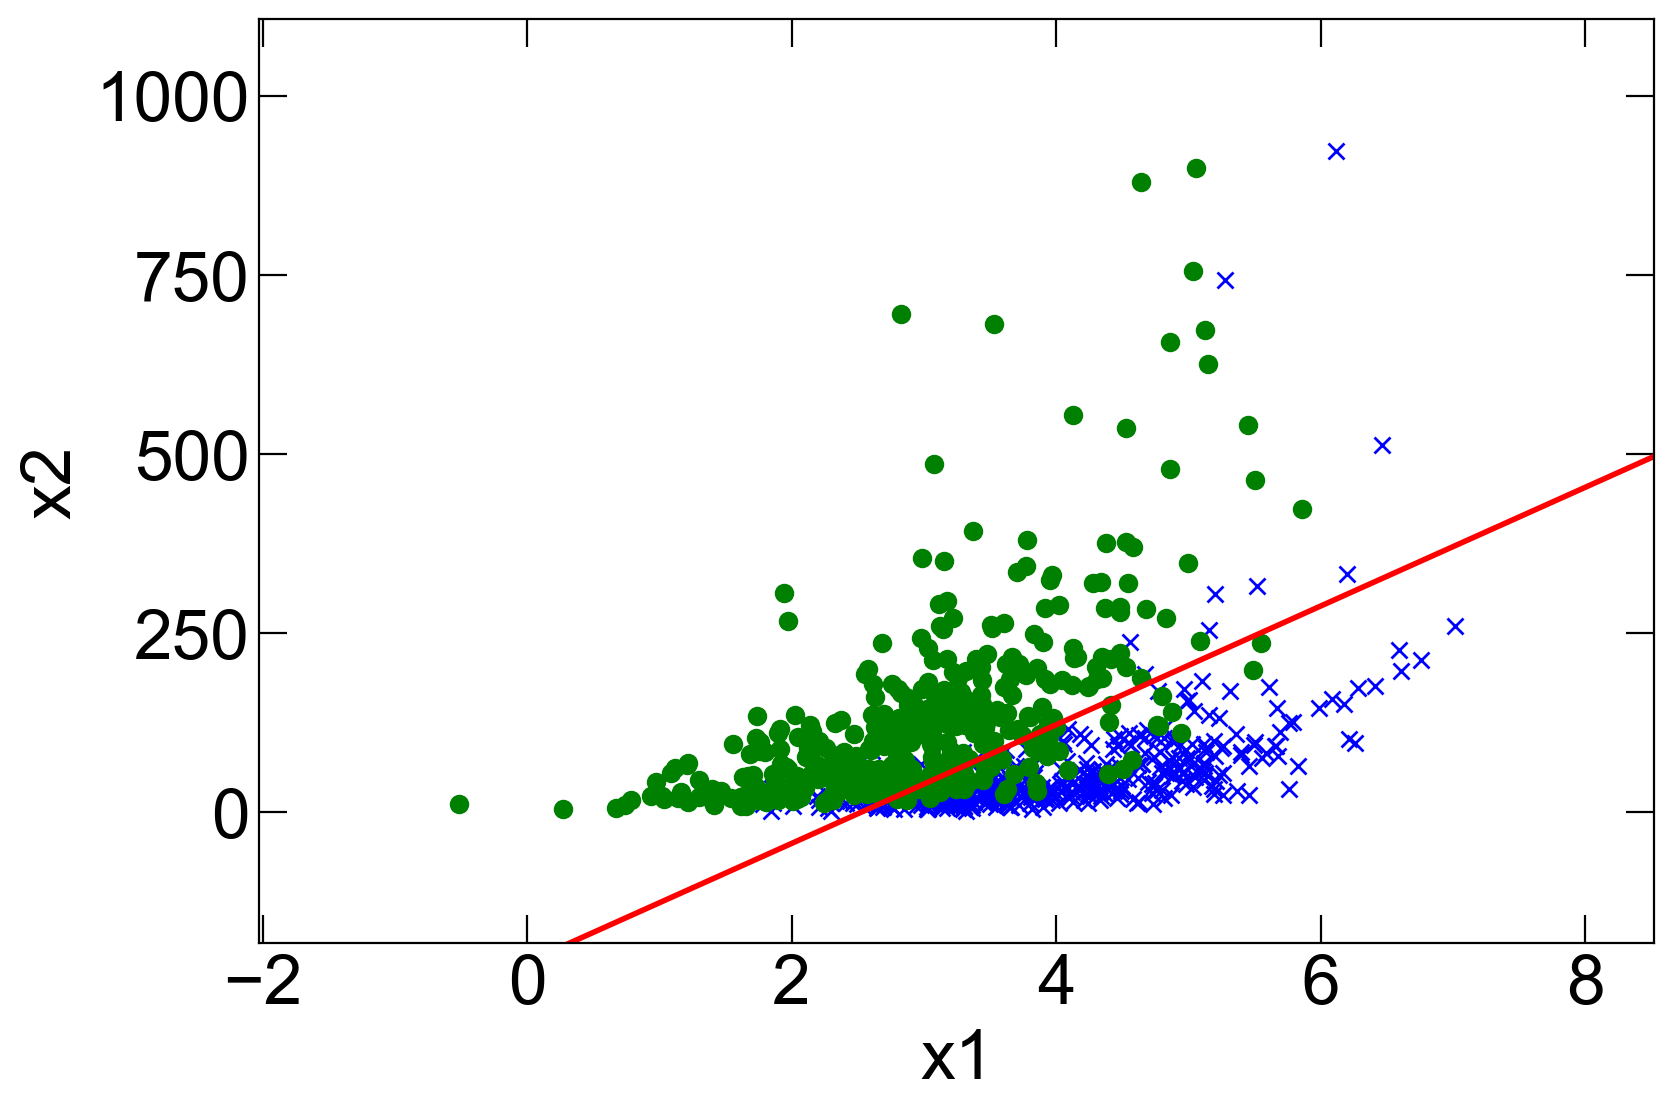

In [73]:
x_train, y_train = util.load_dataset("data/ds1_train.csv", add_intercept=True)
x_valid, y_valid = util.load_dataset("data/ds1_valid.csv", add_intercept=True)

logreg_1 = LogisticRegression()
logreg_1.fit(x_train, y_train)

theta_bf = logreg_1.theta

util.plot(x_train, y_train, theta_bf)
print(f'Accuracy={accuracy_score(y_train, class_pred)}')

Accuracy=0.915


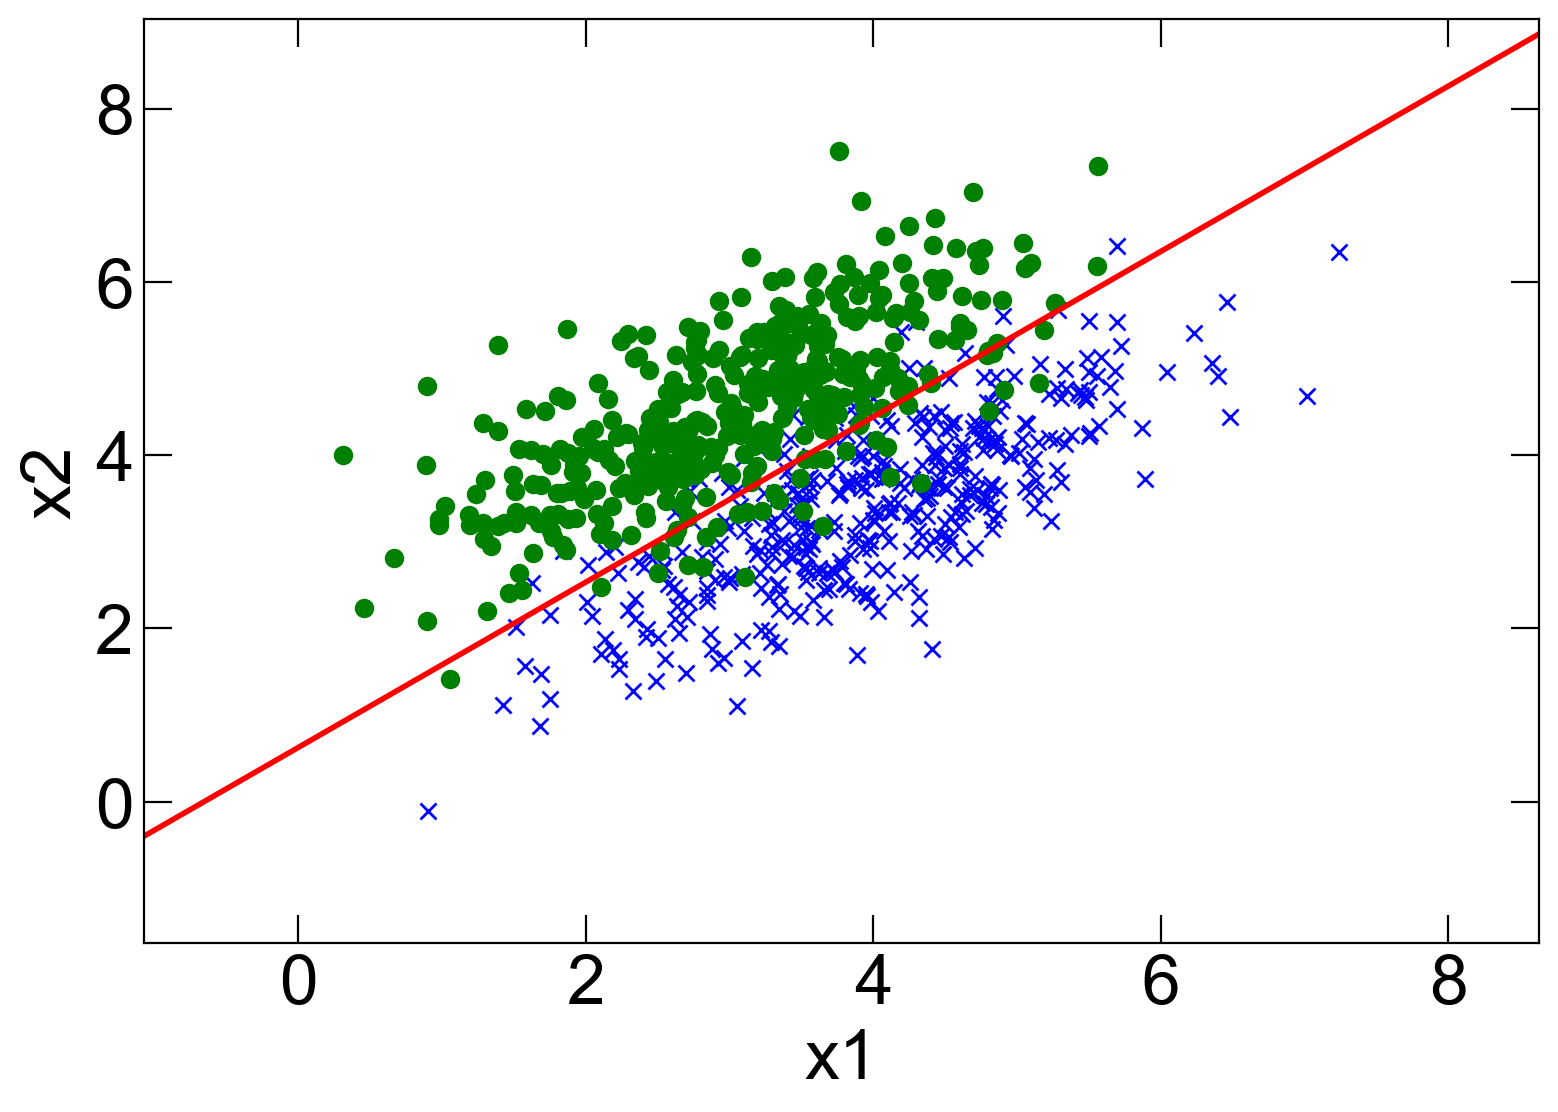

In [74]:
x_train, y_train = util.load_dataset("data/ds2_train.csv", add_intercept=True)
x_valid, y_valid = util.load_dataset("data/ds2_valid.csv", add_intercept=True)
logreg_2 = LogisticRegression()
logreg_2.fit(x_train, y_train)
theta_bf = logreg_2.theta
util.plot(x_train, y_train, theta_bf)

class_pred = (logreg_2.predict(x_train)>0.5).astype(int)
print(f'Accuracy={accuracy_score(y_train, class_pred)}')

Accuracy=0.86625


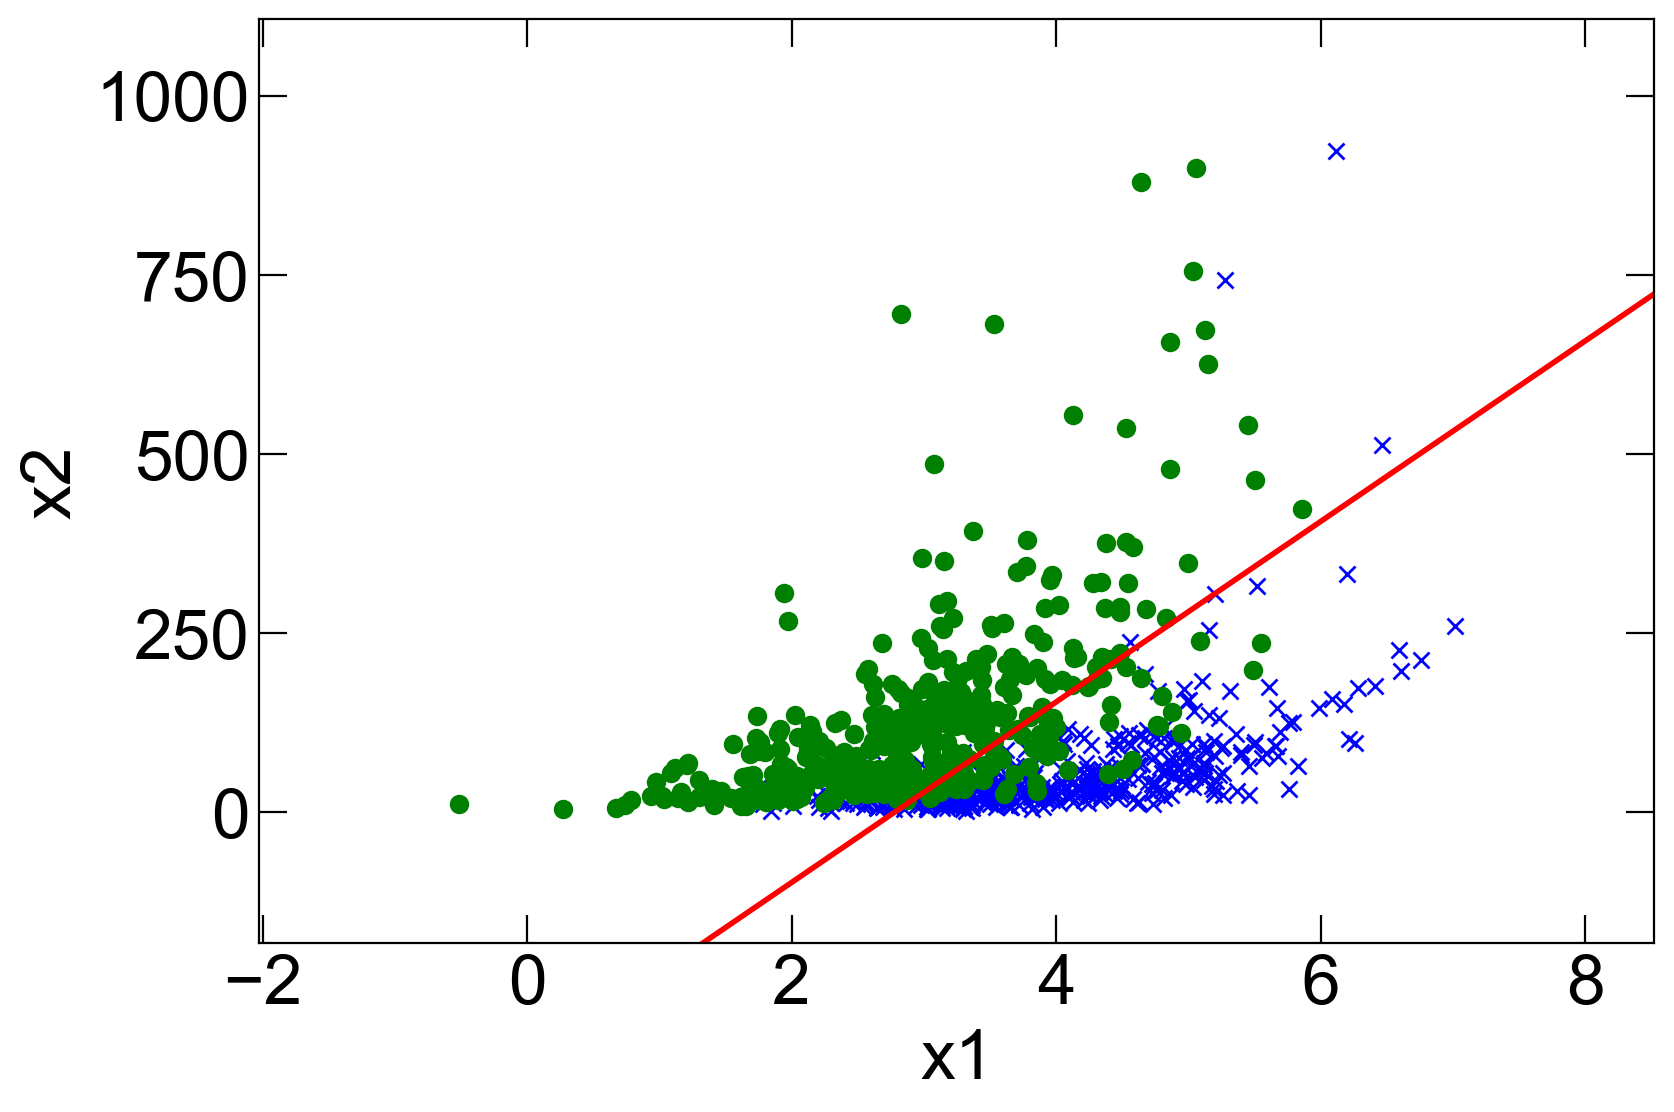

In [149]:
x_train, y_train = util.load_dataset("data/ds1_train.csv", add_intercept=False)
x_valid, y_valid = util.load_dataset("data/ds1_valid.csv", add_intercept=False)

gda_1 = GDA()
gda_1.fit(x_train, y_train)

theta_bf = gda_1.theta

util.plot(x_train, y_train, theta_bf)
class_pred = (gda_1.predict(x_train)>0.5).astype(int)

print(f'Accuracy={accuracy_score(y_train, class_pred)}')

Accuracy=0.91375


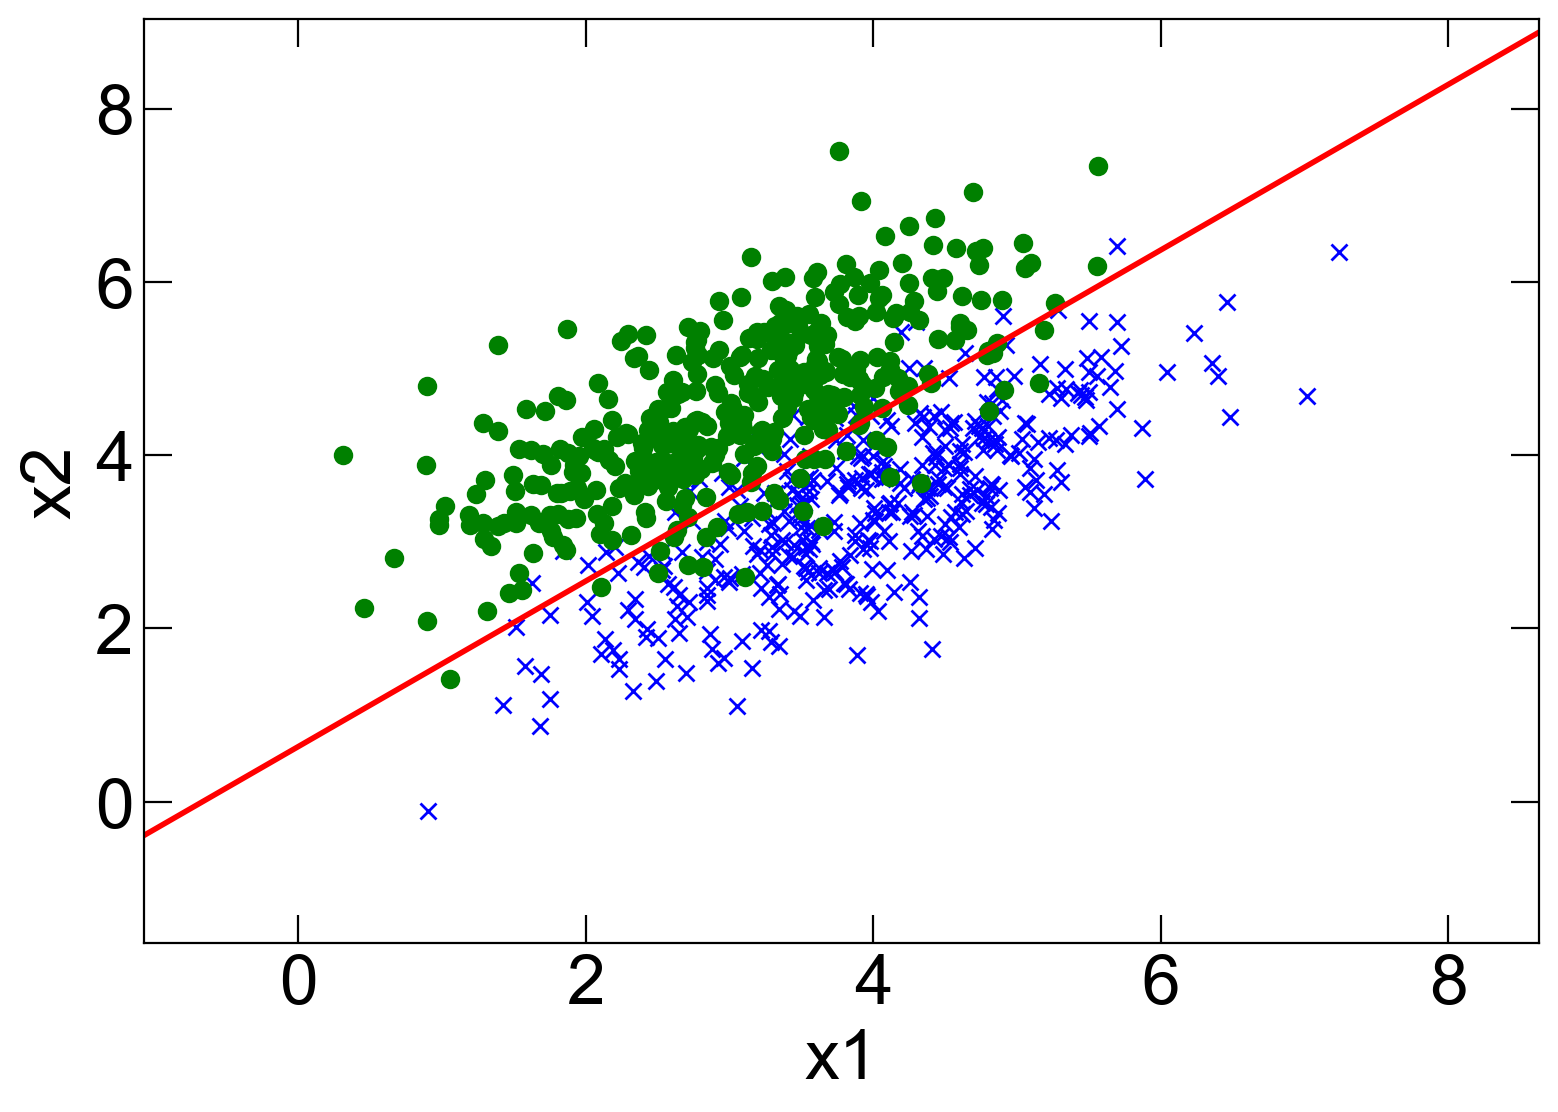

In [150]:
x_train, y_train = util.load_dataset("data/ds2_train.csv", add_intercept=False)
x_valid, y_valid = util.load_dataset("data/ds2_valid.csv", add_intercept=False)

gda_2 = GDA()
gda_2.fit(x_train, y_train)
theta_bf = gda_2.theta

util.plot(x_train, y_train, theta_bf)
class_pred = (gda_2.predict(x_train)>0.5).astype(int)

print(f'Accuracy={accuracy_score(y_train, class_pred)}')

In [190]:
def plot(ax, x=None, y=None, theta=None, color='tab:red', ls='solid', label=None):
    colors = {0: 'tab:blue', 1: 'tab:orange'}
    markers = {0: 's', 1: '^'}
    
    if y is not None:
        cls = np.unique(y)
        for cl in cls:
            mask = (y==cl)
            ax.scatter(x[mask, -2], x[mask, -1], color=colors[cl], marker=markers[cl])

    if theta is not None:
        x = np.linspace(np.min(x[:, -2]), np.max(x[:, -2]), 100)
        ax.plot(x, -theta[0]/theta[2] - theta[1]/theta[2]*x, color=color, ls=ls, label=label)

    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.legend()

Dataset1
Accuracy for logistic regression: 0.9
Accuracy for logistic regression: 0.83


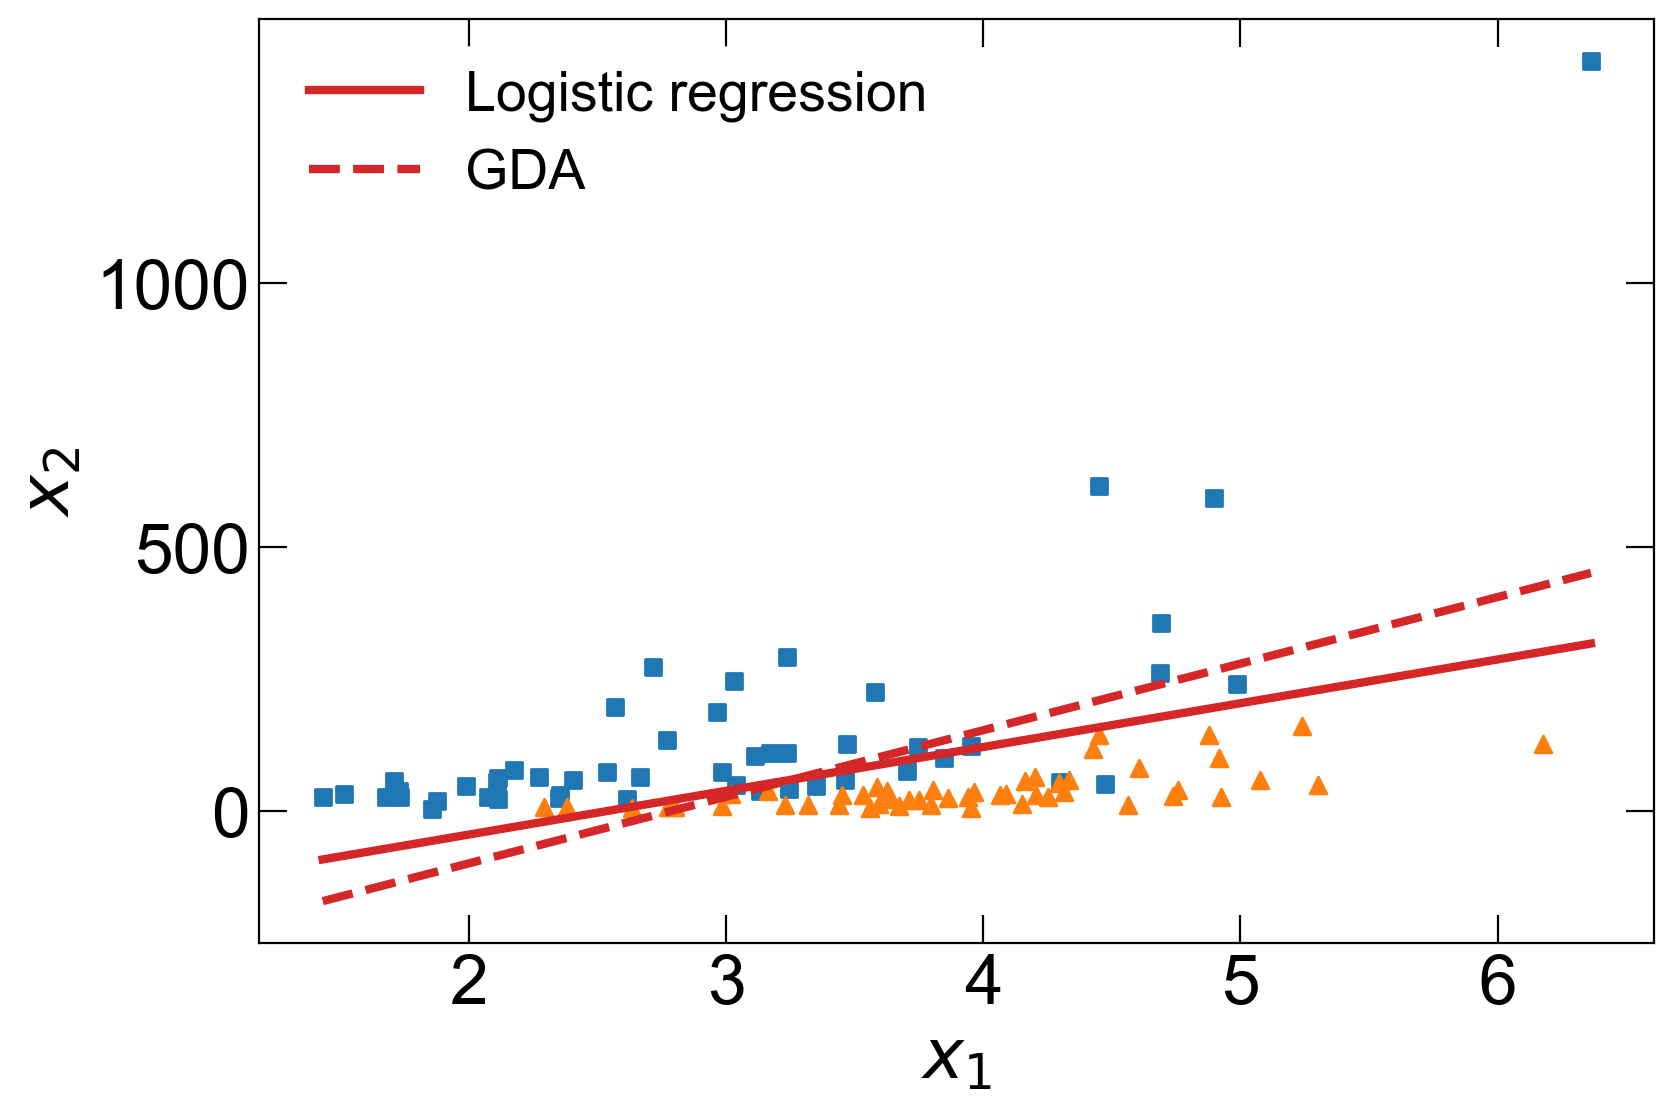

In [111]:
x_valid1, y_valid1 = util.load_dataset("data/ds1_valid.csv", add_intercept=False)
x_valid1_w1, y_valid1_w1 = util.load_dataset("data/ds1_valid.csv", add_intercept=True)

fig, ax = plt.subplots()
plot(ax, x_valid1, y_valid1, logreg_1.theta, label='Logistic regression')
plot(ax, x_valid1, None, gda_1.theta, ls='--', label='GDA')

class_pred = (logreg_1.predict(x_valid1_w1)>0.5).astype(int)
acc_logreg_1 = accuracy_score(y_valid1, class_pred)
class_pred = (gda_1.predict(x_valid1)>0.5).astype(int)
acc_gda_1 = accuracy_score(y_valid1, class_pred)

print('Dataset1')
print(f'Accuracy for logistic regression: {acc_logreg_1}')
print(f'Accuracy for GDA: {acc_gda_1}')

Dataset1
Accuracy for logistic regression: 0.91
Accuracy for GDA: 0.91


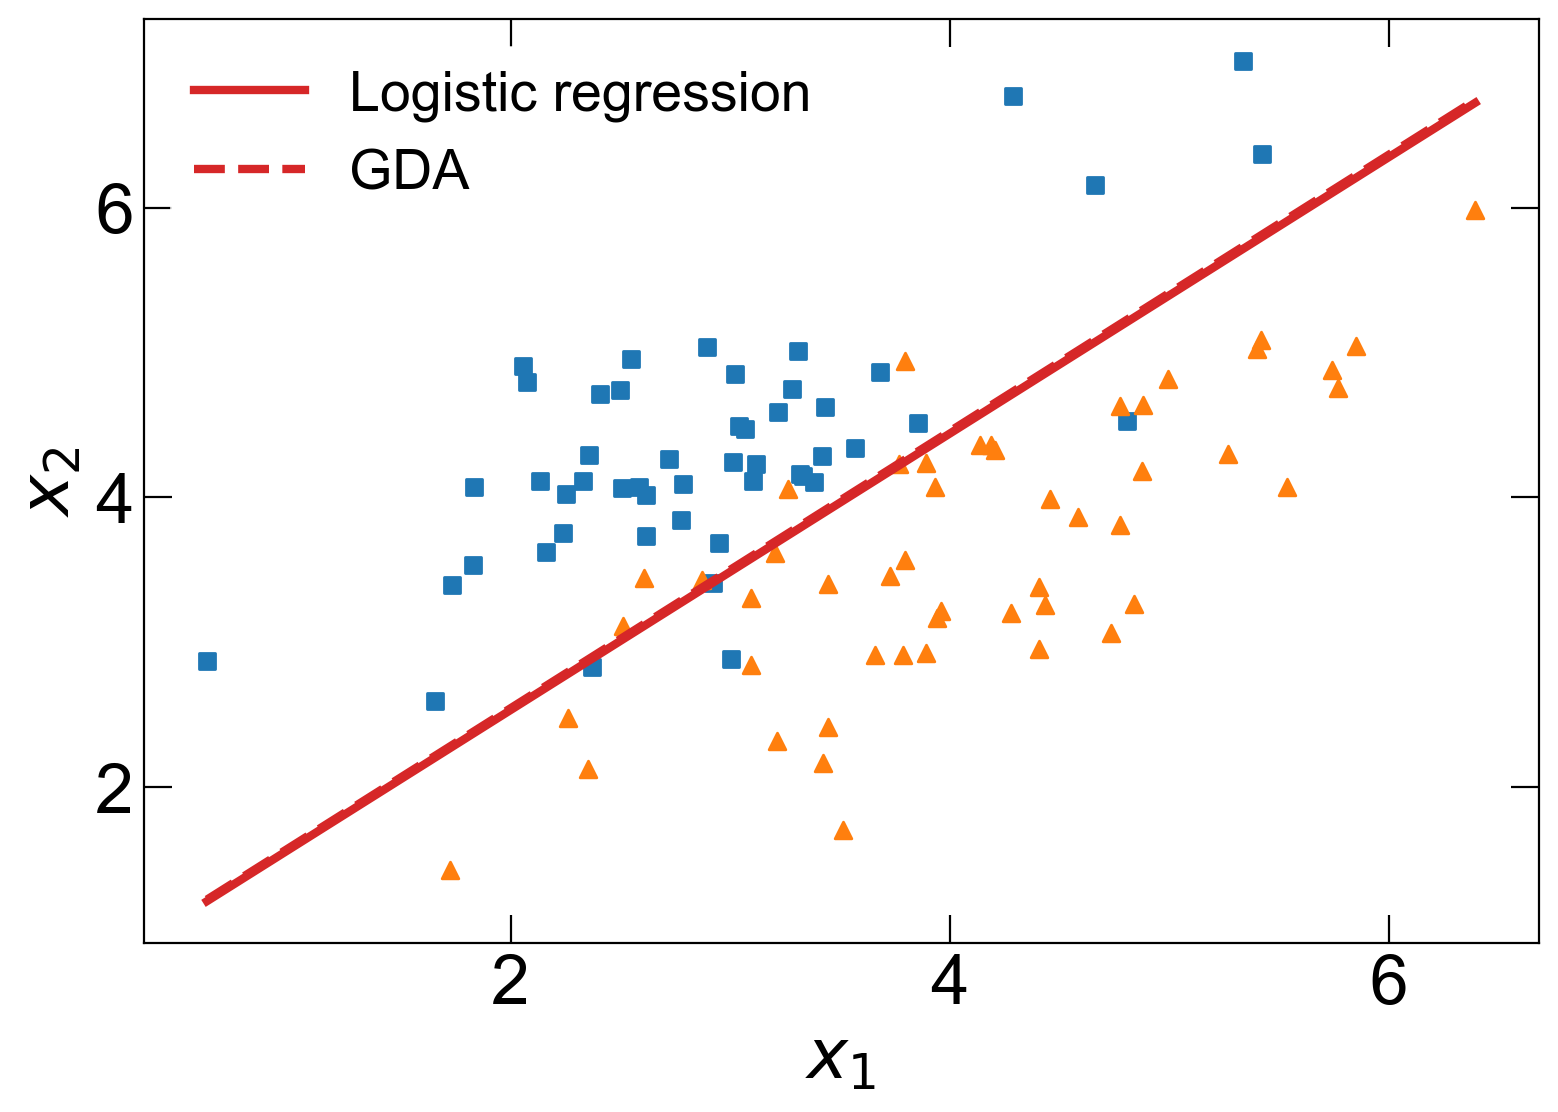

In [113]:
x_valid2, y_valid2 = util.load_dataset("data/ds2_valid.csv", add_intercept=False)
x_valid2_w1, y_valid2_w1 = util.load_dataset("data/ds2_valid.csv", add_intercept=True)

fig, ax = plt.subplots()
plot(ax, x_valid2, y_valid2, logreg_2.theta, label='Logistic regression')
plot(ax, x_valid2, None, gda_2.theta, ls='--', label='GDA')

class_pred = (logreg_2.predict(x_valid2_w1)>0.5).astype(int)
acc_logreg_2 = accuracy_score(y_valid2, class_pred)
class_pred = (gda_2.predict(x_valid2)>0.5).astype(int)
acc_gda_2 = accuracy_score(y_valid2, class_pred)

print('Dataset1')
print(f'Accuracy for logistic regression: {acc_logreg_2}')
print(f'Accuracy for GDA: {acc_gda_2}')

In [124]:
ds1_train_trans = ds1_train.copy()
ds1_train_trans['x_2'] = np.log(ds1_train['x_2'])

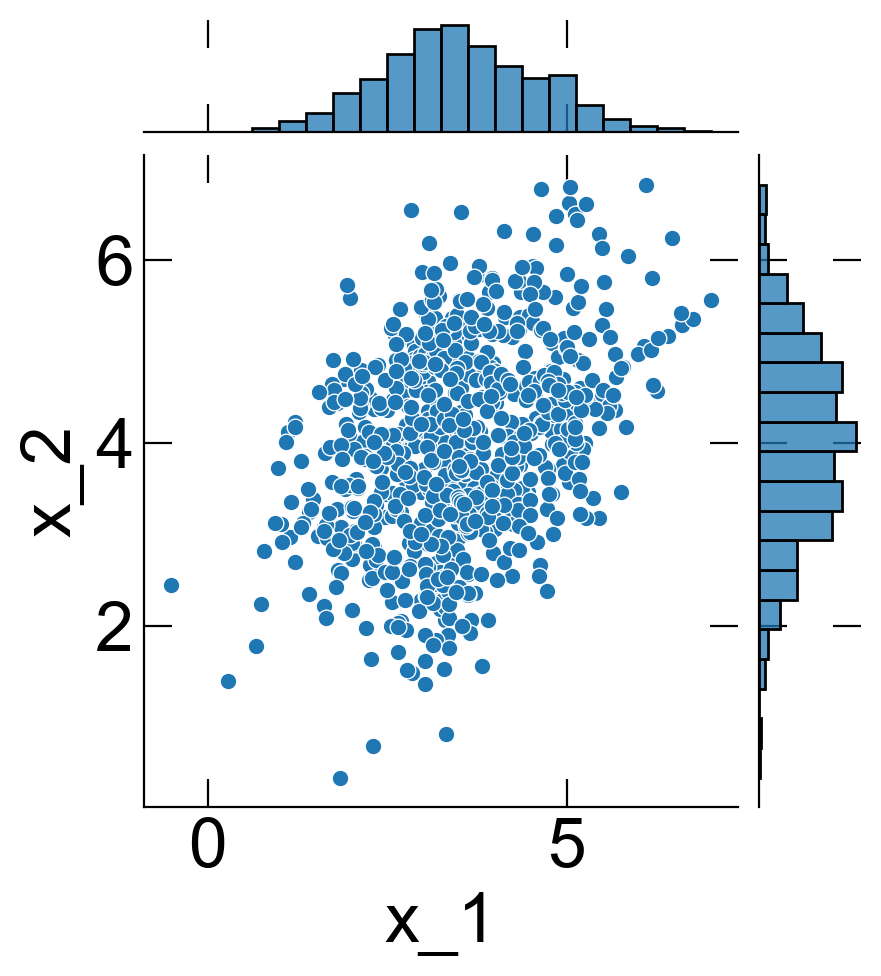

In [125]:
# Joint distribution
sns.jointplot(
    data=ds1_train_trans,
    x='x_1',
    y='x_2',
    kind='scatter',  # or 'kde', 'hex', 'hist'
    height=5,        # overall figure size
    marginal_kws=dict(bins=20, fill=True)
)

In [166]:
def transform(x):
    result = x.copy()
    result[:, -1] = np.log(x[:, -1])
    return result

In [168]:
x_train, y_train = util.load_dataset("data/ds1_train.csv", add_intercept=False)
x_valid, y_valid = util.load_dataset("data/ds1_valid.csv", add_intercept=False)

x_train = transform(x_train)

gda_1_trans = GDA()
gda_1_trans.fit(x_train, y_train)

x_train, y_train = util.load_dataset("data/ds1_train.csv", add_intercept=True)
x_valid, y_valid = util.load_dataset("data/ds1_valid.csv", add_intercept=True)

x_train = transform(x_train)

logreg_1_trans = LogisticRegression()
logreg_1_trans.fit(x_train, y_train)

Dataset1
Accuracy for logistic regression: 0.95
Accuracy for GDA: 0.95


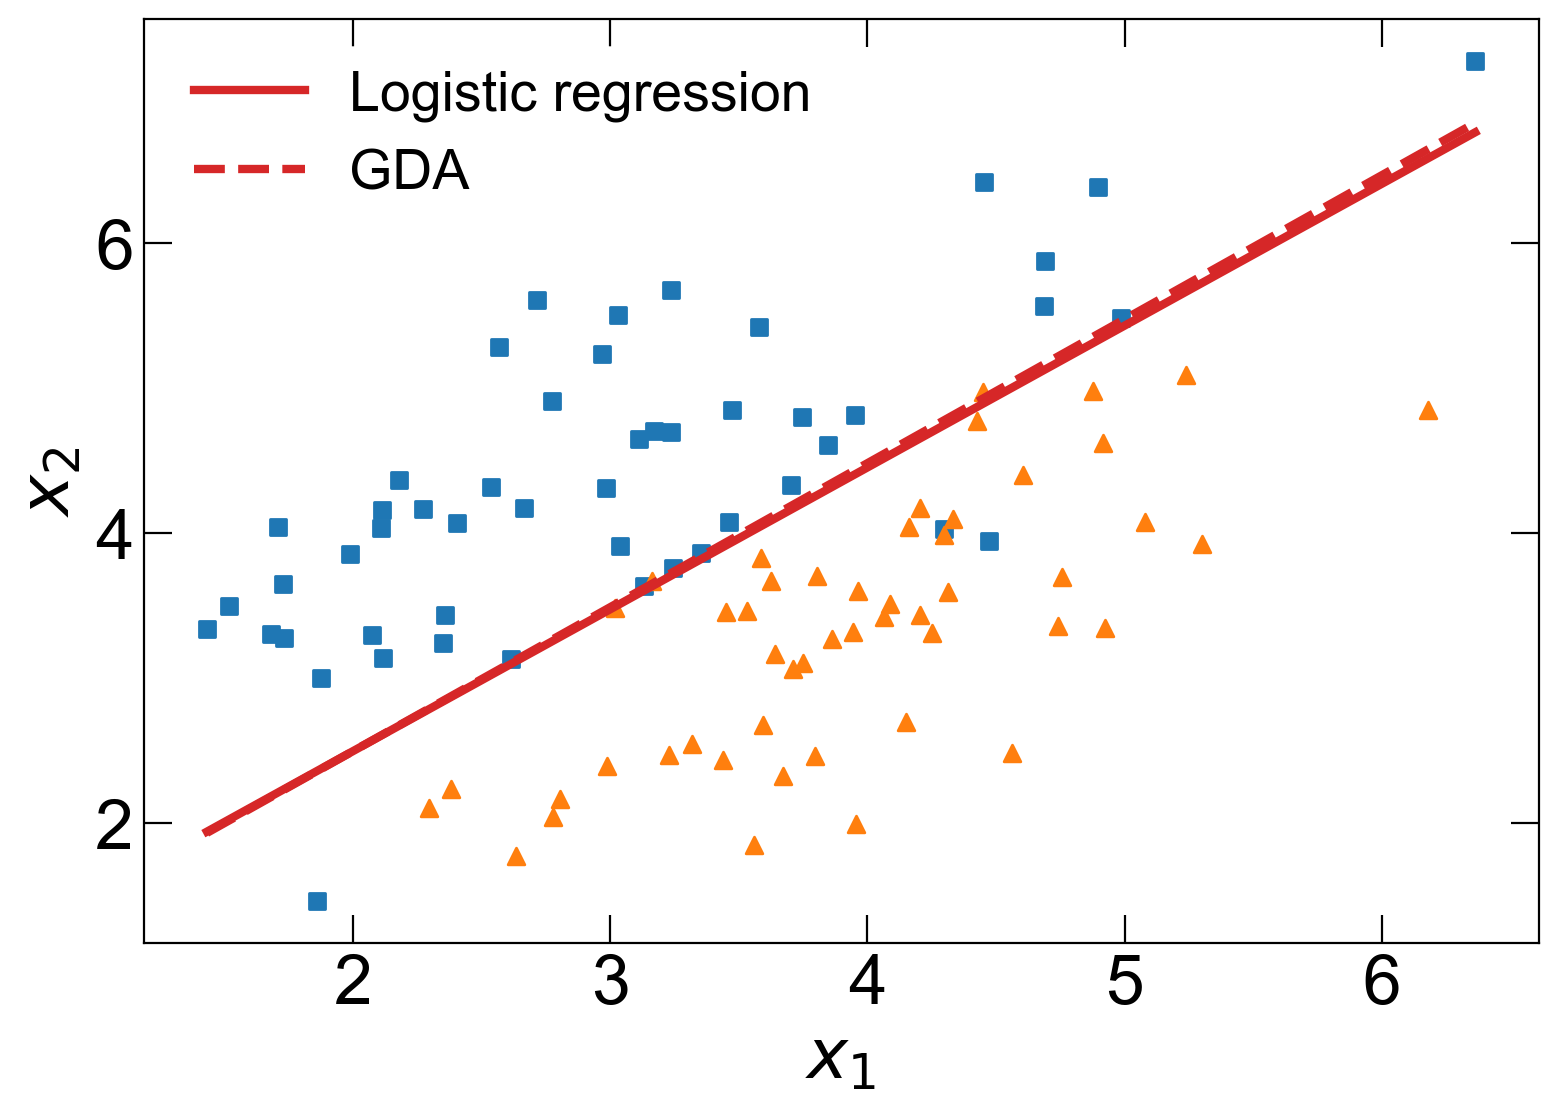

In [170]:
x_valid1, y_valid1 = util.load_dataset("data/ds1_valid.csv", add_intercept=False)
x_valid1_w1, y_valid1_w1 = util.load_dataset("data/ds1_valid.csv", add_intercept=True)

x_valid1_trans = transform(x_valid1)
x_valid1_w1_trans = transform(x_valid1_w1)

fig, ax = plt.subplots()
plot(ax, x_valid1_trans, y_valid1, logreg_1_trans.theta, label='Logistic regression')
plot(ax, x_valid1_trans, None, gda_1_trans.theta, ls='--', label='GDA')

class_pred = (logreg_1_trans.predict(x_valid1_w1_trans)>0.5).astype(int)
acc_logreg_1 = accuracy_score(y_valid1, class_pred)
class_pred = (gda_1_trans.predict(x_valid1_trans)>0.5).astype(int)
acc_gda_1 = accuracy_score(y_valid1, class_pred)

print('Dataset1')
print(f'Accuracy for logistic regression: {acc_logreg_1}')
print(f'Accuracy for GDA: {acc_gda_1}')

## Problem 2

### Using true labels

Accuracy=0.9632


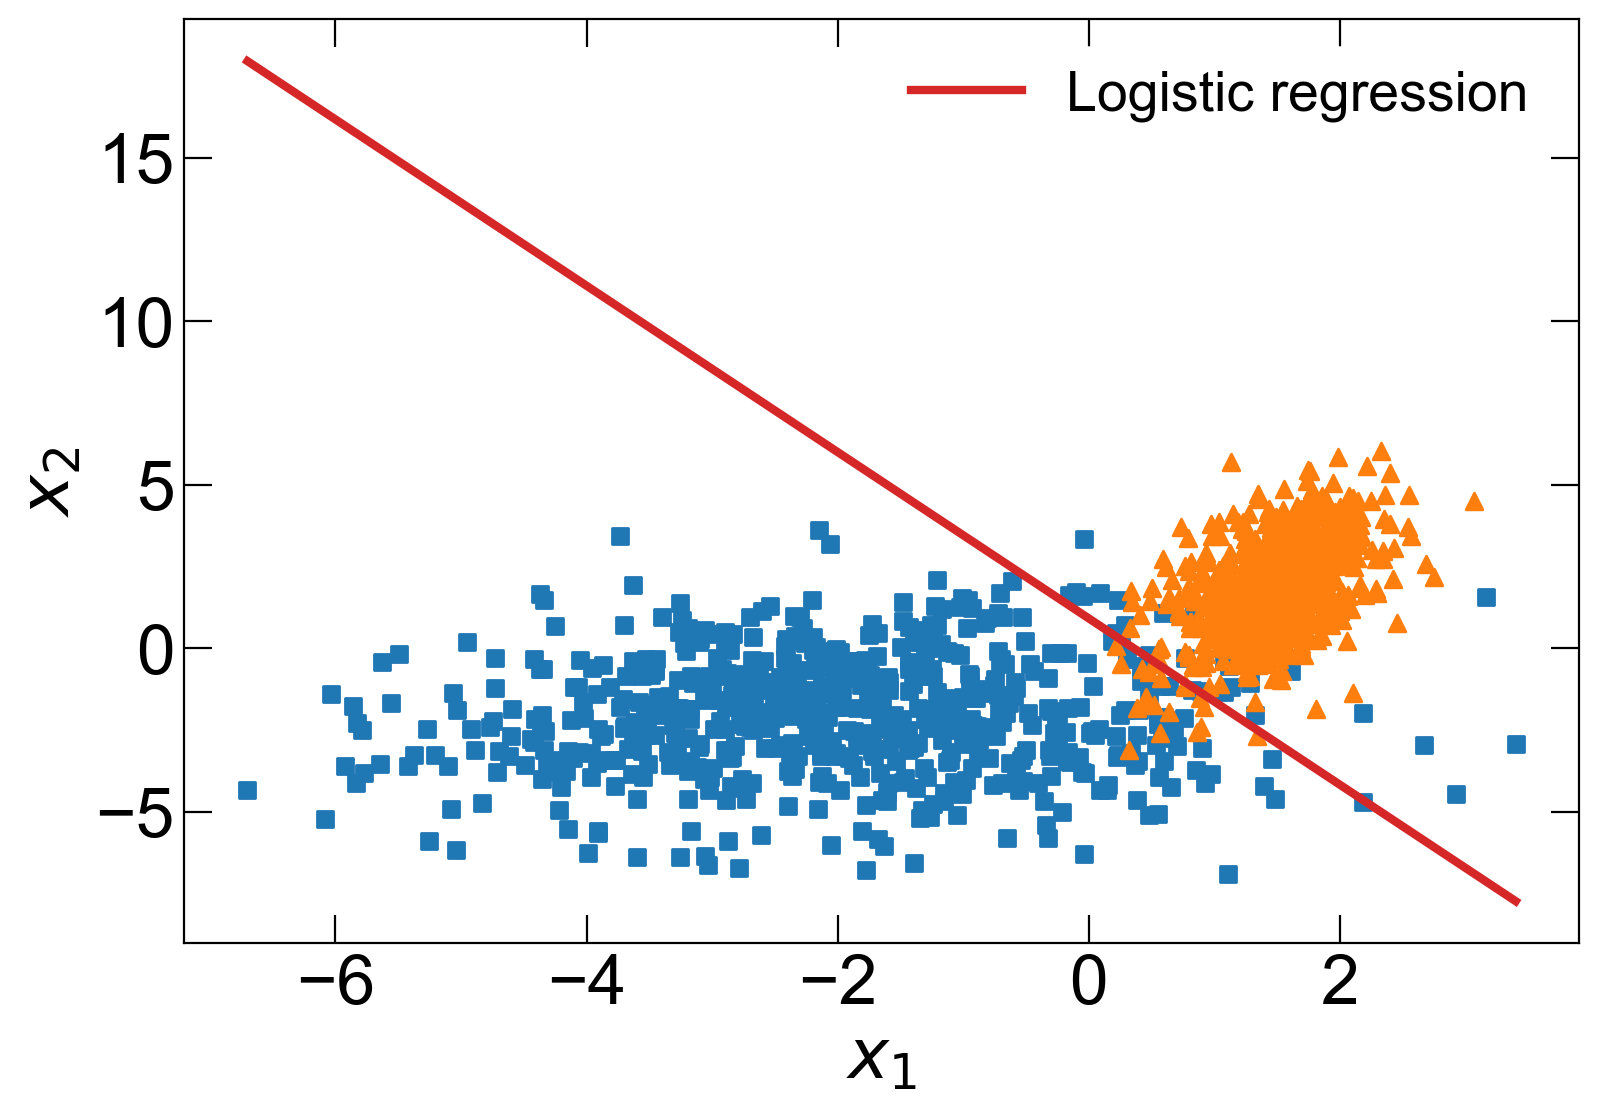

In [205]:
x_train, y_train = util.load_dataset("data/ds3_train.csv", label_col='t', add_intercept=True)

logreg_t = LogisticRegression()
logreg_t.fit(x_train, y_train)

class_pred = (logreg_t.predict(x_train)>0.5).astype(int)

fig, ax = plt.subplots()
plot(ax, x_train, y_train, logreg_t.theta, label='Logistic regression')
print(f'Accuracy={accuracy_score(y_train, class_pred)}')

### Using Y labels

Accuracy=0.9


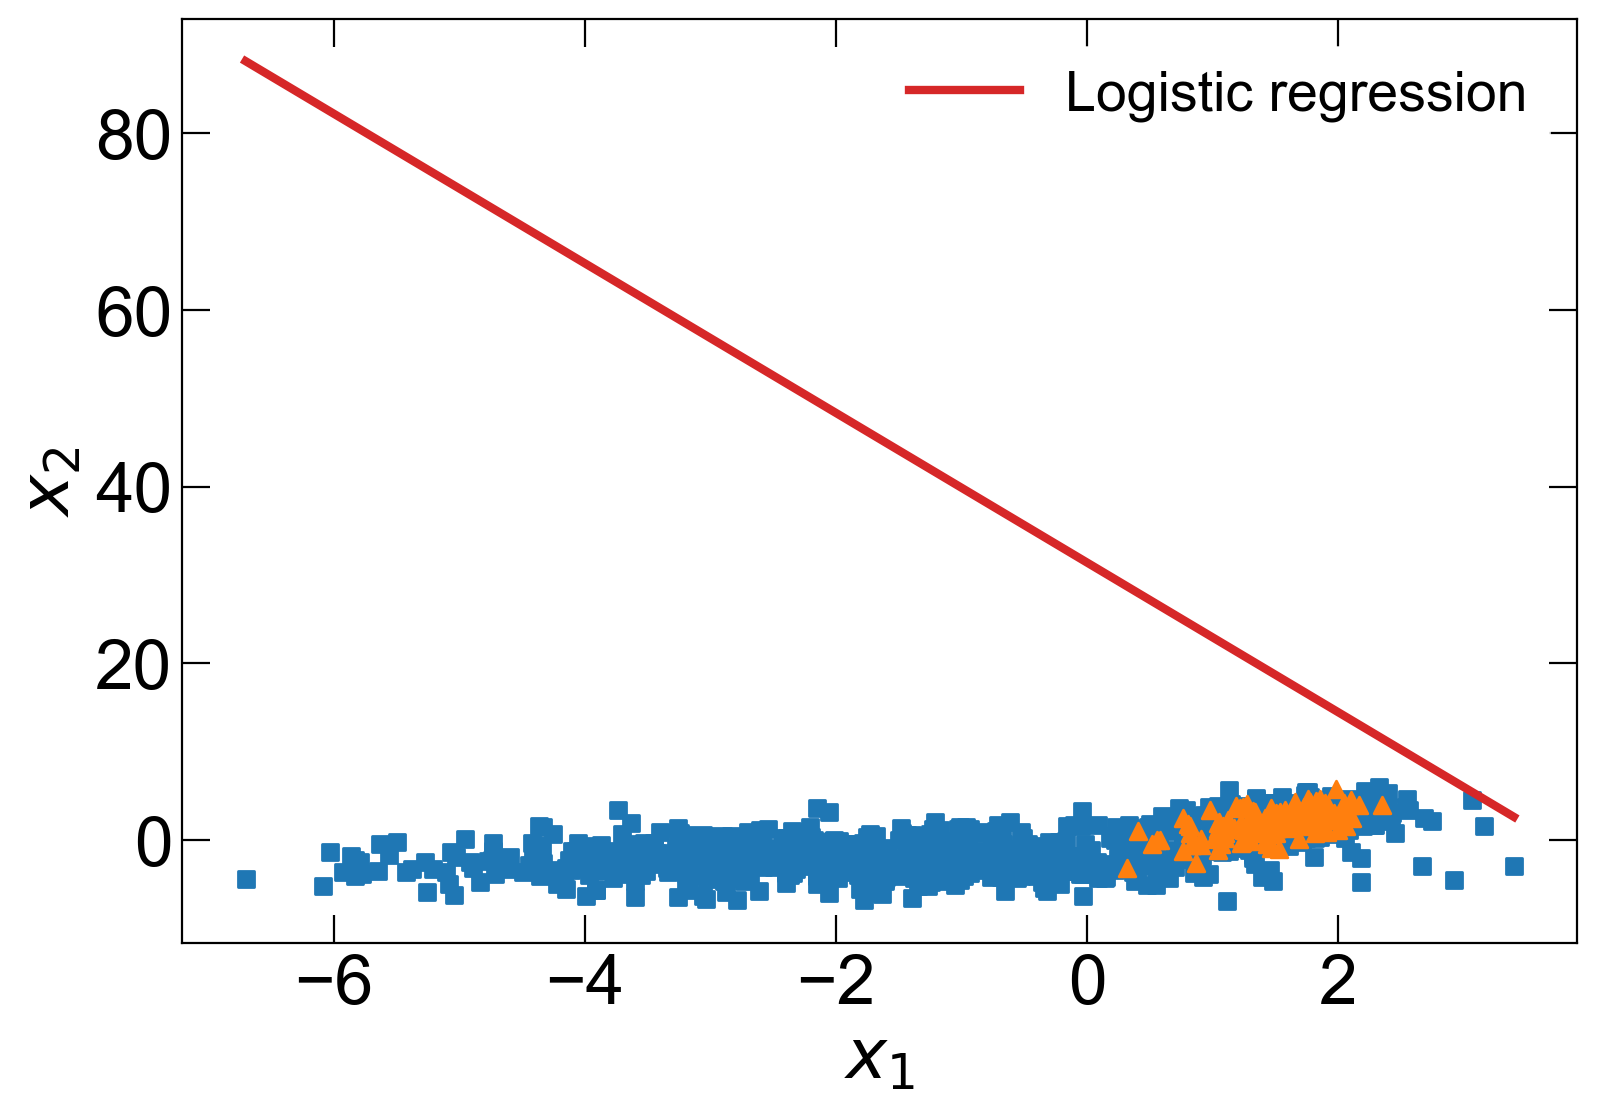

In [227]:
x_train, y_train = util.load_dataset("data/ds3_train.csv", label_col='y', add_intercept=True)

logreg_y = LogisticRegression()
logreg_y.fit(x_train, y_train)

class_pred = (logreg_y.predict(x_train)>0.5).astype(int)

fig, ax = plt.subplots()
plot(ax, x_train, y_train, logreg_y.theta, label='Logistic regression')
print(f'Accuracy={accuracy_score(y_train, class_pred)}')

In [219]:
x_valid, y_valid = util.load_dataset("data/ds3_train.csv", label_col='y', add_intercept=True)

x_valid_plus = x_valid[y_valid==1]
alpha = np.sum(logreg_y.predict(x_valid_plus), axis=0)/x_valid_plus.shape[0]

print(f'Alpha={alpha}')

Alpha=0.17692378501880157


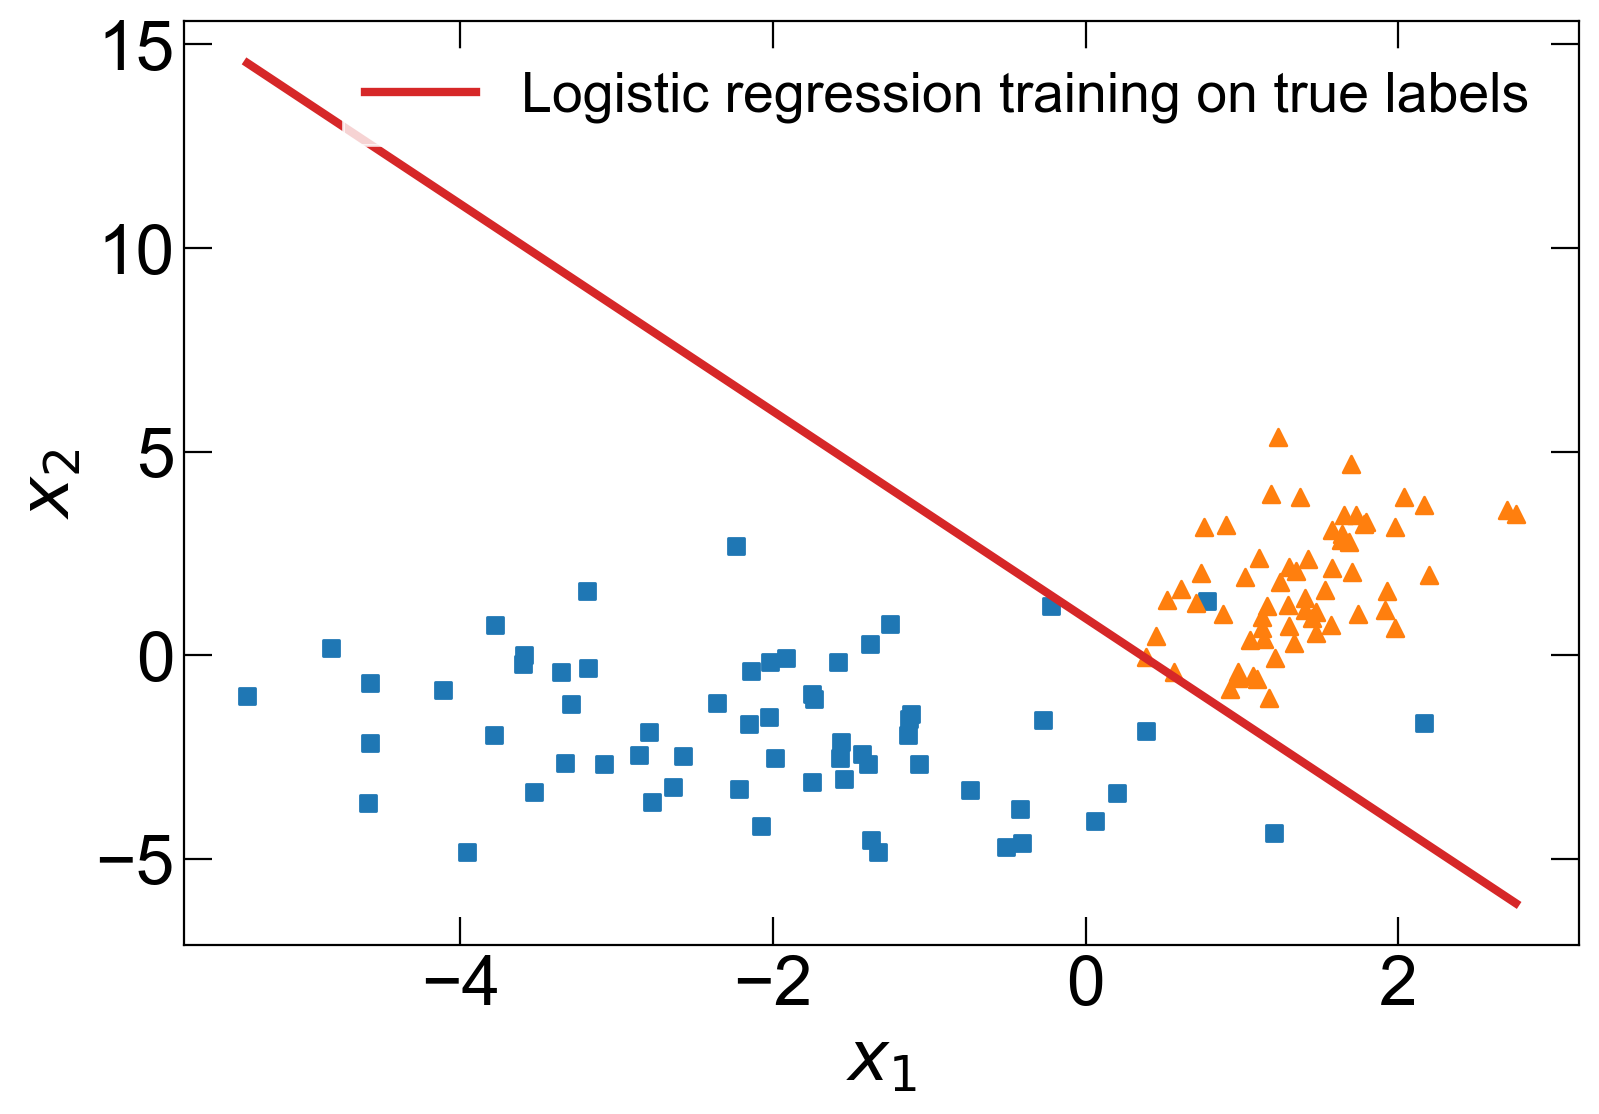

In [220]:
x_test, y_test = util.load_dataset("data/ds3_test.csv", label_col='t', add_intercept=True)

fig, ax = plt.subplots()
plot(ax, x_test, y_test, logreg_t.theta, label='Logistic regression training on true labels')


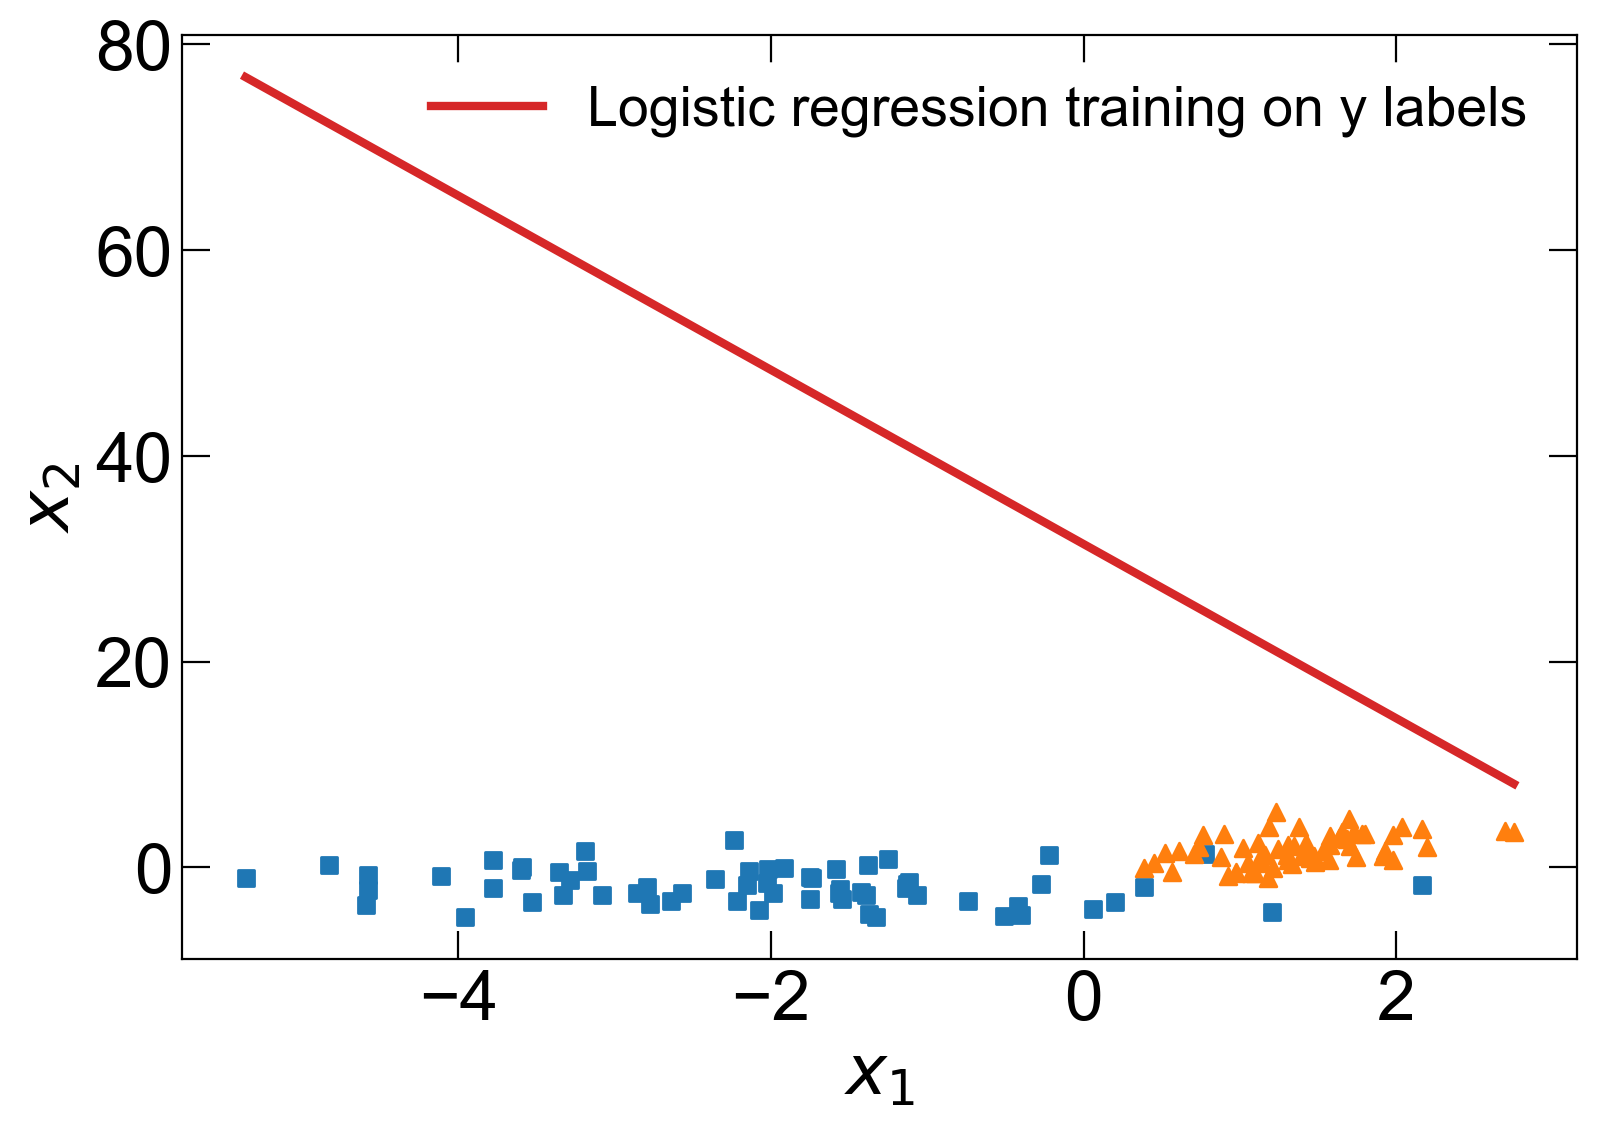

In [221]:
fig, ax = plt.subplots()
plot(ax, x_test, y_test, logreg_y.theta, label='Logistic regression training on y labels')


In [226]:
def theta_after_scaling(theta, alpha):
    result = theta.copy()
    result[0] = theta[0]-np.log(alpha/(2-alpha))
    return result

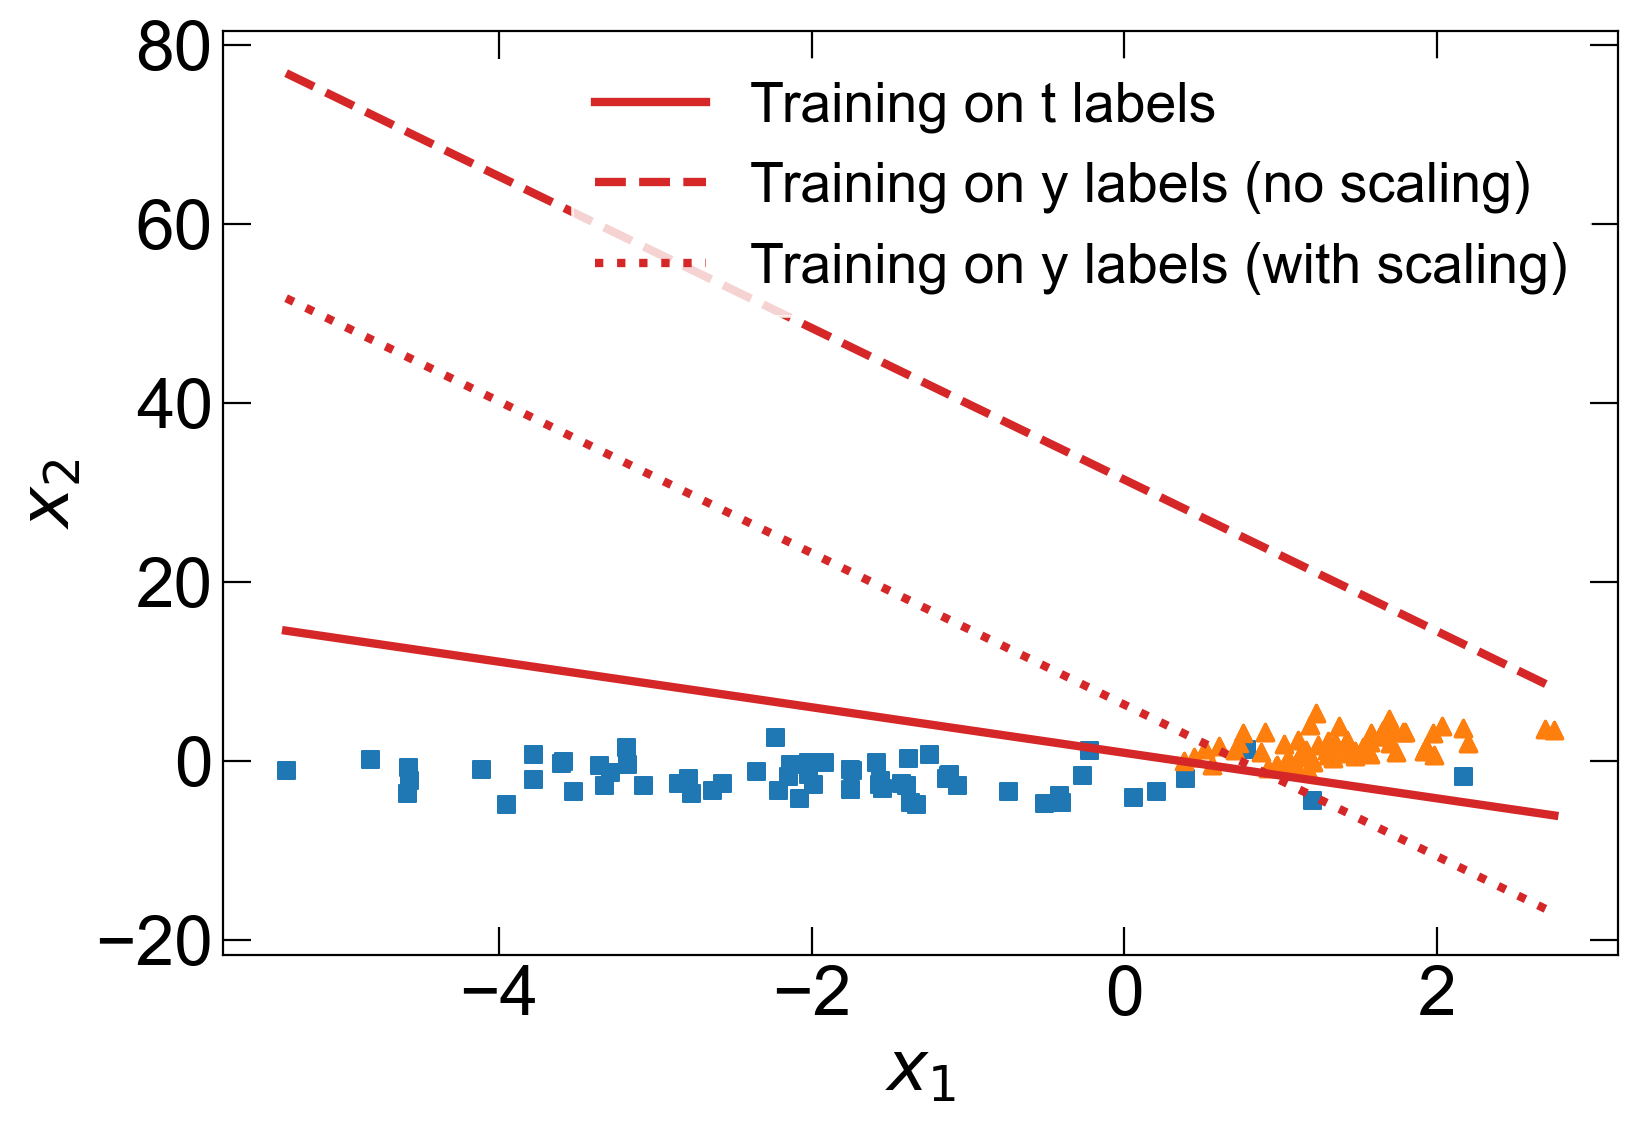

In [232]:
fig, ax = plt.subplots()
plot(ax, x_test, y_test, logreg_t.theta, label='Training on t labels', ls='-')
plot(ax, x_test, y_test, logreg_y.theta, label='Training on y labels (no scaling)', ls='--')
plot(ax, x_test, y_test, theta_after_scaling(logreg_y.theta, alpha), label='Training on y labels (with scaling)', ls='dotted')


### Check accuracy for each case

In [235]:
class_pred_t = (logreg_t.predict(x_test)>0.5).astype(int)
class_pred_y = (logreg_y.predict(x_test)/alpha>0.5).astype(int)

print(f'Accuracy traing on t={accuracy_score(y_test, class_pred_t)}')
print(f'Accuracy traing on y={accuracy_score(y_test, class_pred_y)}')

Accuracy traing on t=0.9838709677419355
Accuracy traing on y=0.9516129032258065


## Problem 3

In [249]:
y_train

array([ 2463097.,   645481.,   474123., ...,  1016002., 10620315.,
         558245.])

0.5665507515413595 1
0.56655057085491 2
0.5665501506422638 3
0.5665491623385869 4
0.5665468125039674 5
0.5665411665602443 6
0.5665274641529018 7
0.5664938896026477 8
0.5664108762169952 9
0.5662038876743144 10
0.5656838219512206 11
0.5643688078696808 12
0.5610308974683218 13
0.5525739120518909 14
0.5314832905210155 15
0.48149437417962576 16
0.37828857963399076 17
0.22808491899198582 18
0.13489592168241799 19
0.11878153566859809 20
0.11005187408227184 21
0.10118554532214331 22
0.09233415991984771 23
0.08372355264642123 24
0.07555834903476696 25
0.06800380809626391 26
0.06117593574902305 27
0.05513915773686783 28
0.04991000279870922 29
0.04546462271868484 30
0.04174820338933949 31
0.038684890557931326 32
0.03618731130783565 33
0.03416498801040066 34
0.03253106245470487 35
0.031206960312025203 36
0.03012496050346742 37
0.02922896945309665 38
0.02847400375170291 39
0.027824916020139503 40
0.027254805832858713 41
0.026743416588322497 42
0.026275687228904256 43
0.025840530170332096 44
0.02542

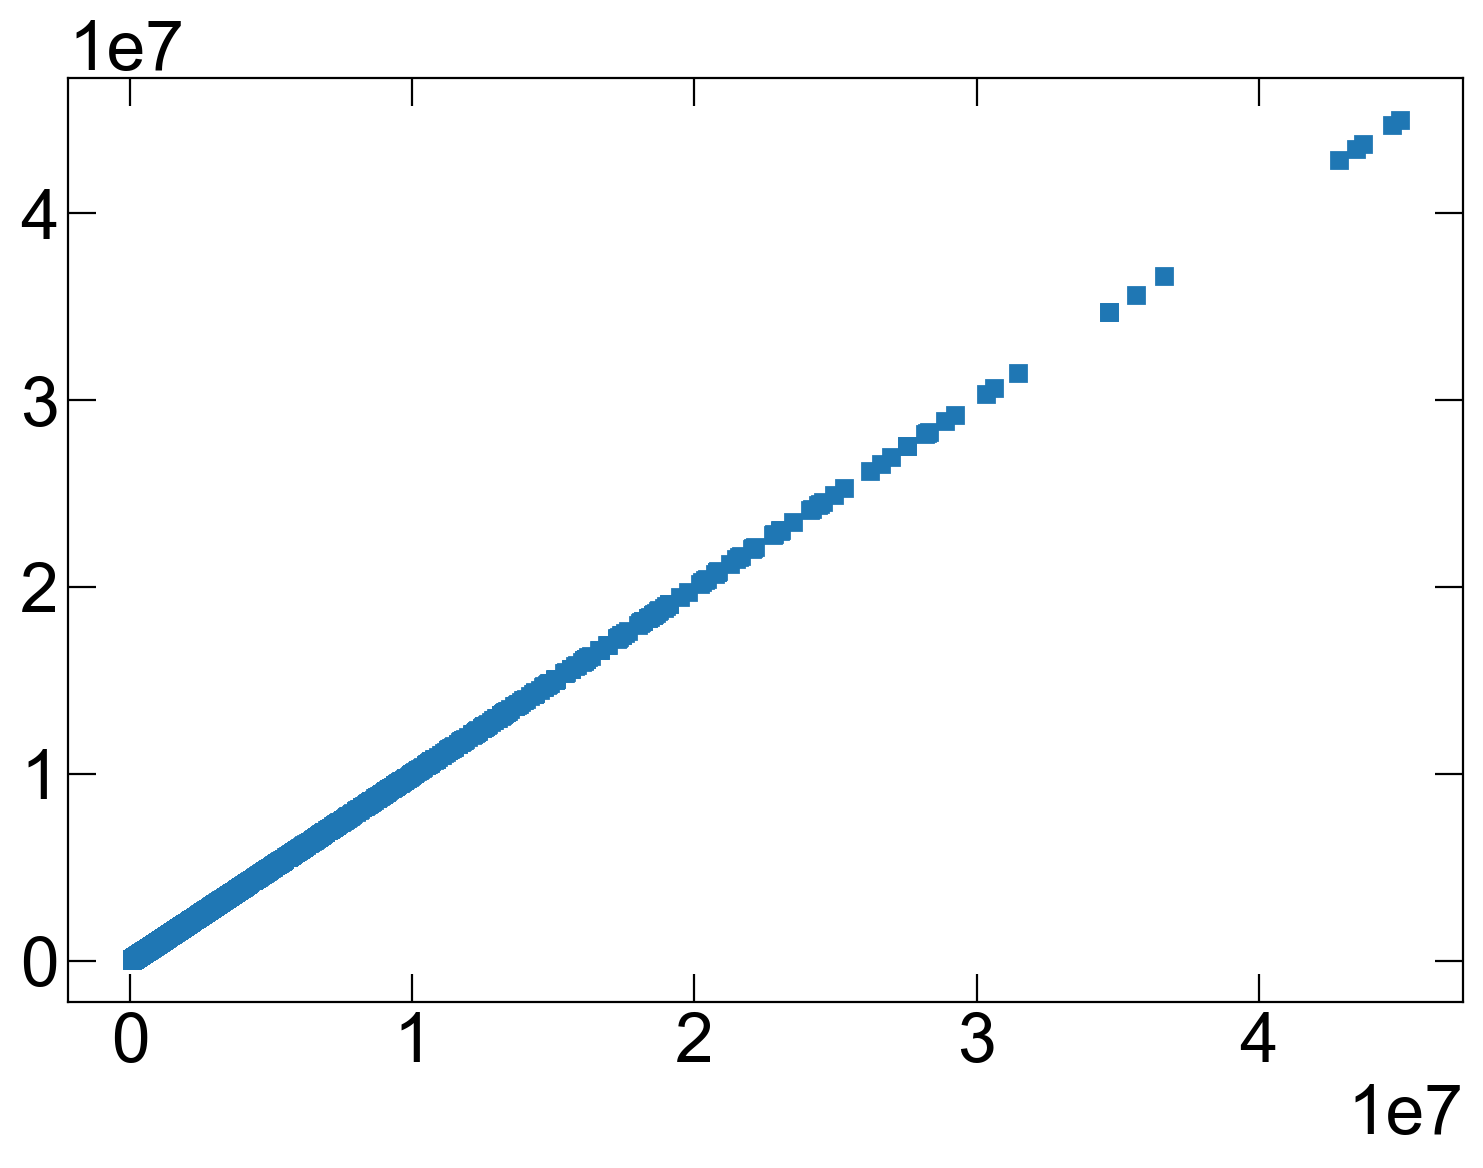

In [47]:
x_train, y_train = util.load_dataset("data/ds4_train.csv", add_intercept=True)

posreg = PoissonRegression(step_size=0.0000001, max_iter=10e3)
posreg.fit(x_train, y_train)

plt.plot(posreg.predict(x_train), y_train, ls='', marker='s')

## Problem 4 (solved in notebook) (only theory)

## Problem 5 

In [179]:
from src.p05b_lwr import LocallyWeightedLinearRegression
from sklearn.metrics import mean_squared_error

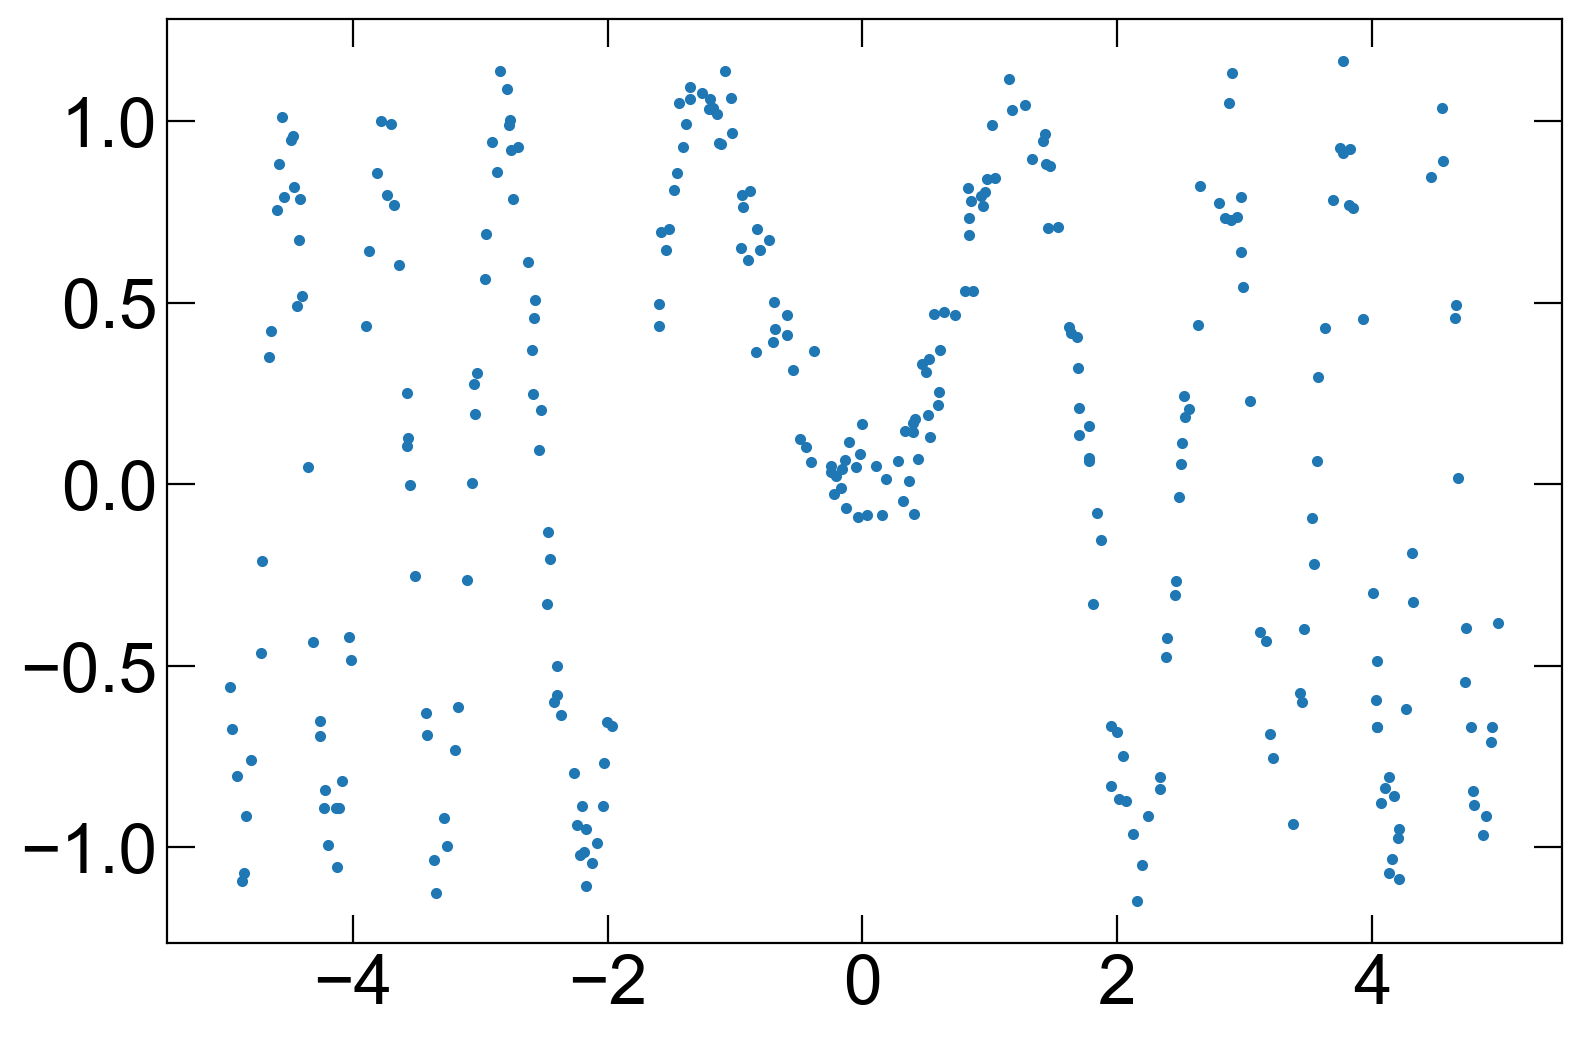

In [137]:
x_train, y_train = util.load_dataset("data/ds5_train.csv", add_intercept=True)

plt.plot(x_train[:, 1], y_train, marker='.', ls='')

### Fit the model

In [186]:
wlinreg = LocallyWeightedLinearRegression(tau=0.5)
wlinreg.fit(x_train, y_train)

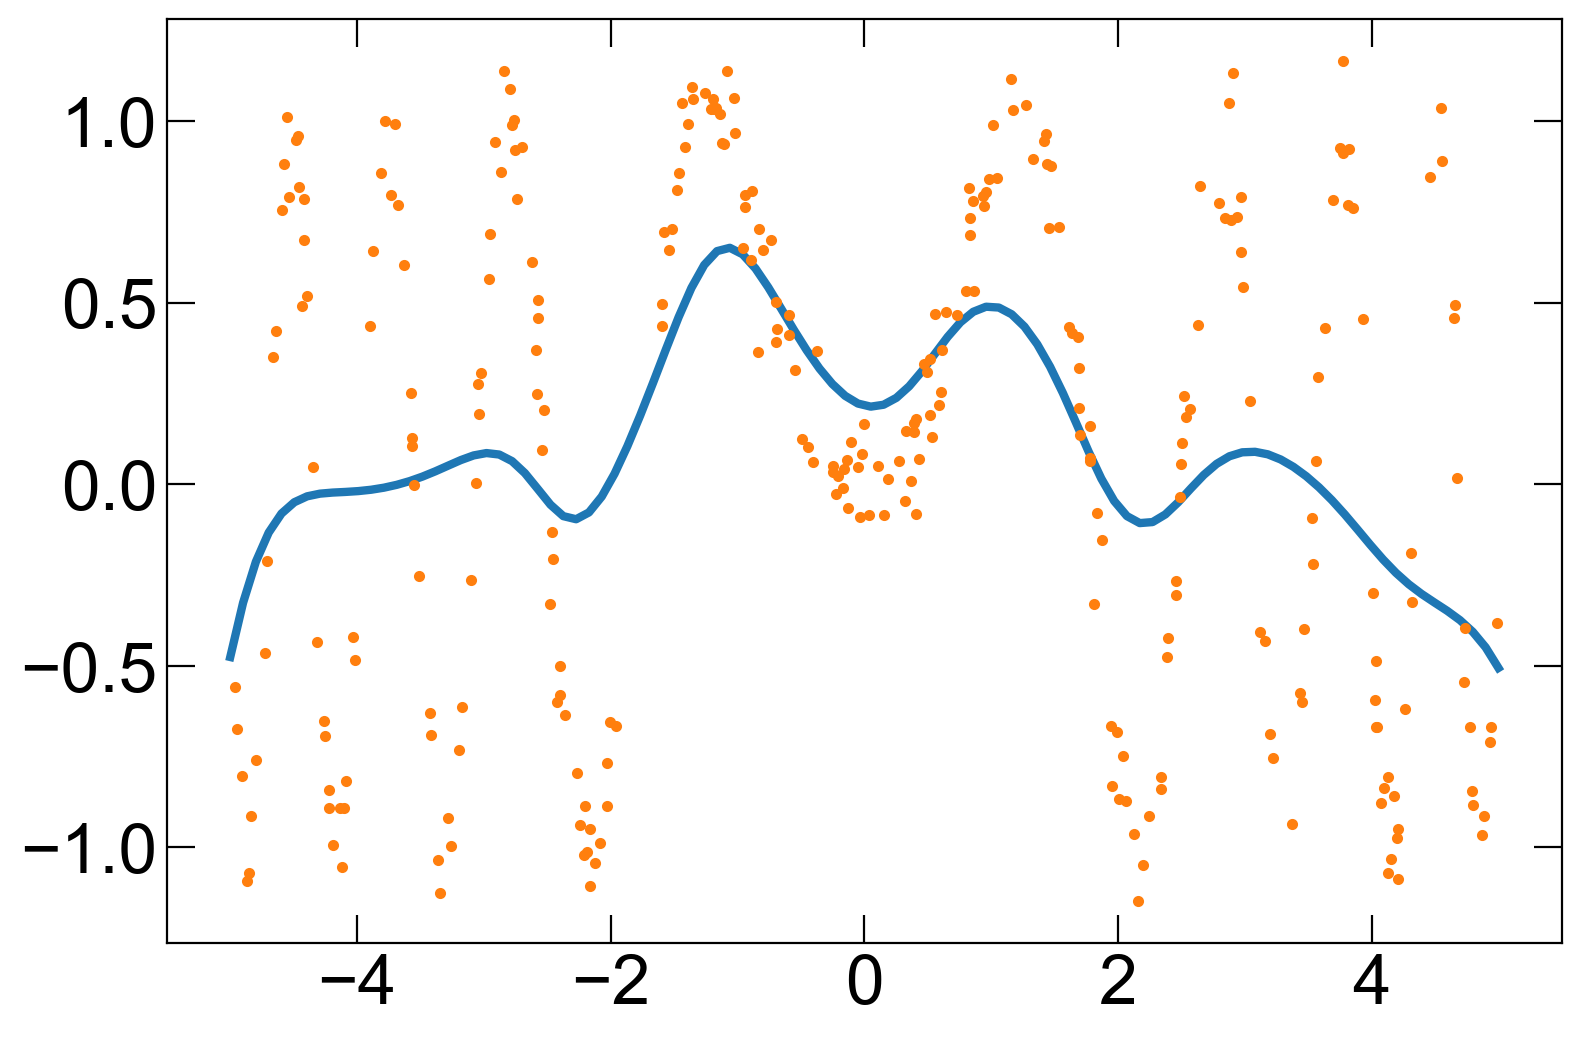

In [187]:
x = np.linspace(-5, 5, 100)
x = np.c_[np.ones(100), x]
thetas = []
y_preds = []
prediction = wlinreg.predict(x)

plt.plot(x[:, 1], prediction, label='Train prediction')
plt.plot(x_train[:, 1], y_train, marker='.', ls='', label='Train data')

### Evaluate the performance for validation set

MSE for validation set is 0.3305312682137527


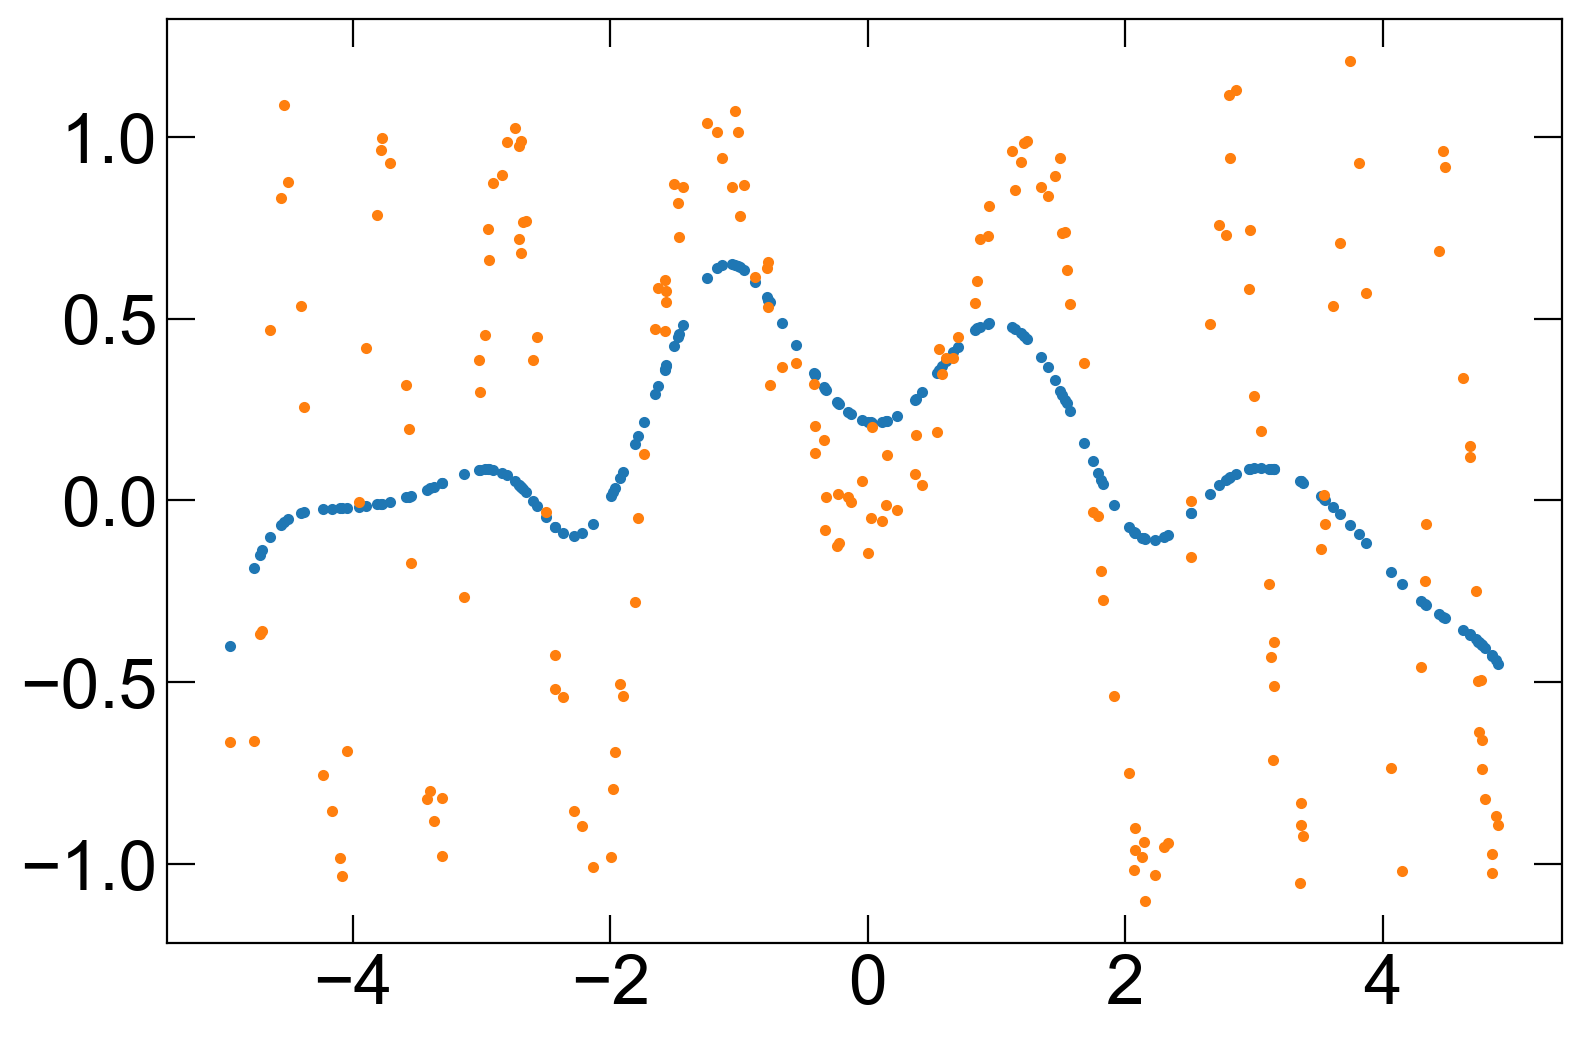

In [188]:
x_valid, y_valid = util.load_dataset("data/ds5_valid.csv", add_intercept=True)
prediction_valid = wlinreg.predict(x_valid)

MSE = mean_squared_error(y_valid, prediction_valid)
print(f'MSE for validation set is {MSE}')

plt.plot(x_valid[:, 1], prediction_valid, marker='.', ls='', label='Train prediction')
plt.plot(x_valid[:, 1], y_valid, marker='.', ls='', label='Train data')


### Optimize the tau parameter

Text(0, 0.5, 'y')

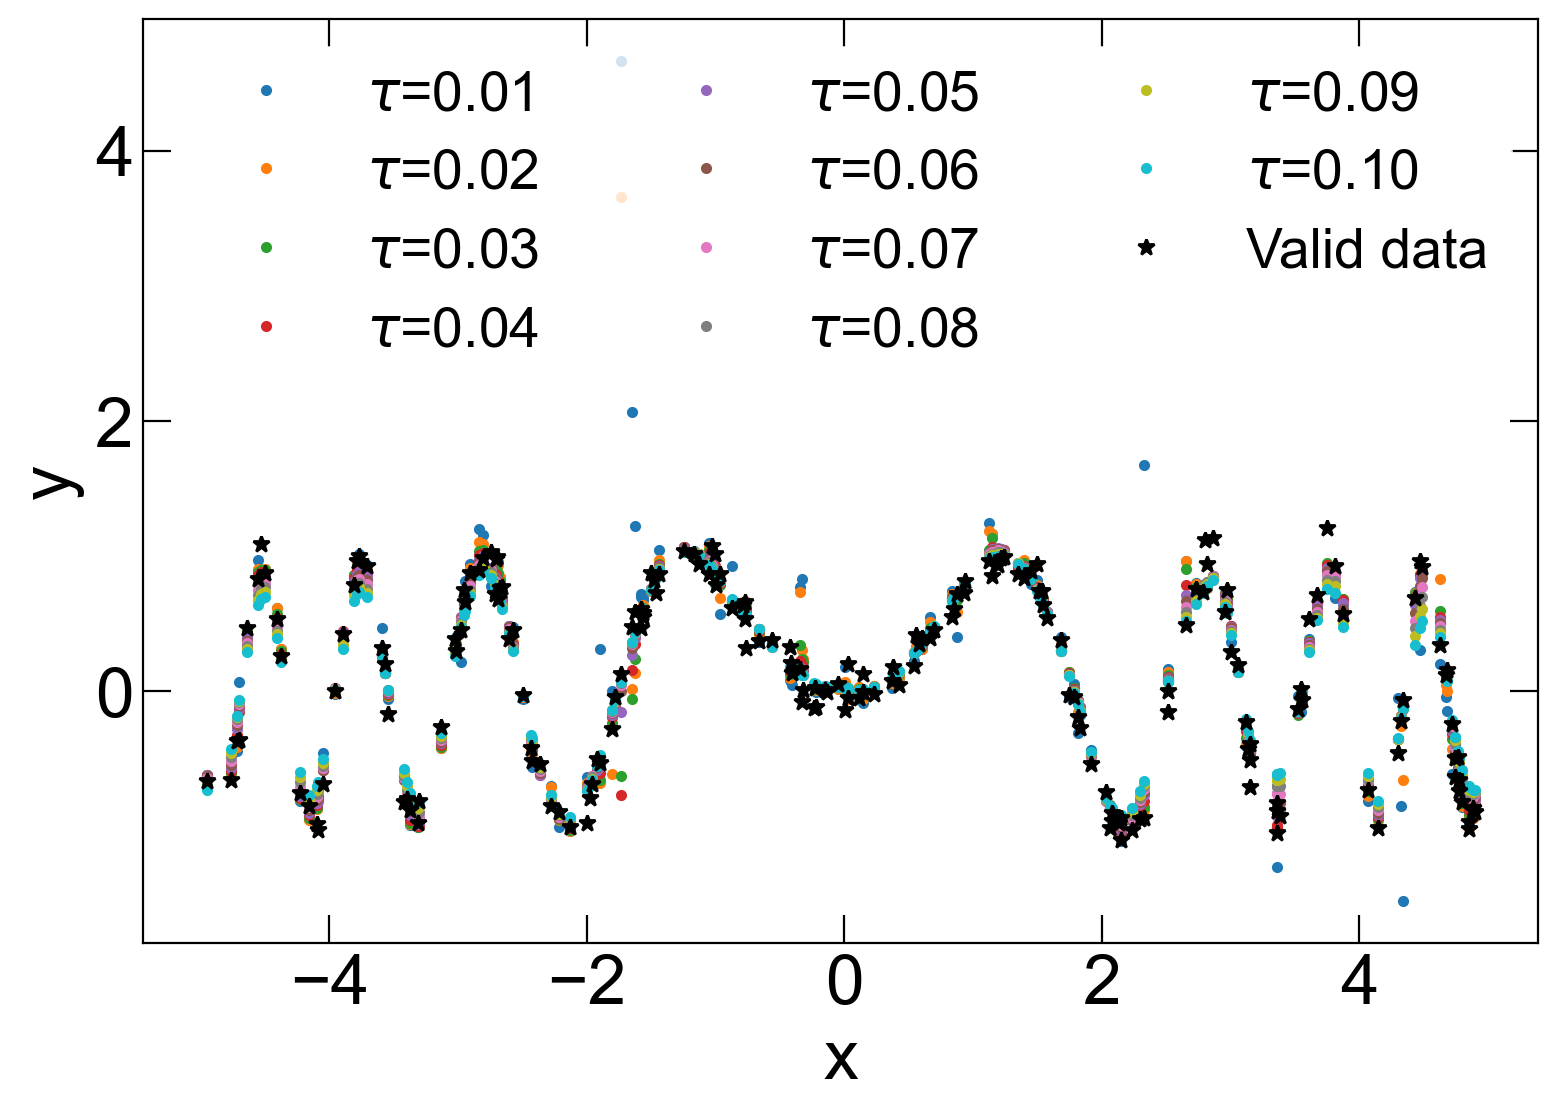

In [220]:
taus = np.linspace(0.01, 0.1, 10)
MSE_per_tau = []

for tau in taus:
    wlinreg = LocallyWeightedLinearRegression(tau=tau)
    wlinreg.fit(x_train, y_train)
    prediction_valid = wlinreg.predict(x_valid)
    MSE_per_tau.append(mean_squared_error(y_valid, prediction_valid))
    plt.plot(x_valid[:, 1], prediction_valid, marker='.', ls='', label=f'$\\tau$={tau:.02f}')
    
plt.plot(x_valid[:, 1], y_valid, marker='*', ls='', color='black', label='Valid data')
plt.legend(ncol=3)
plt.xlabel('x')
plt.ylabel('y')


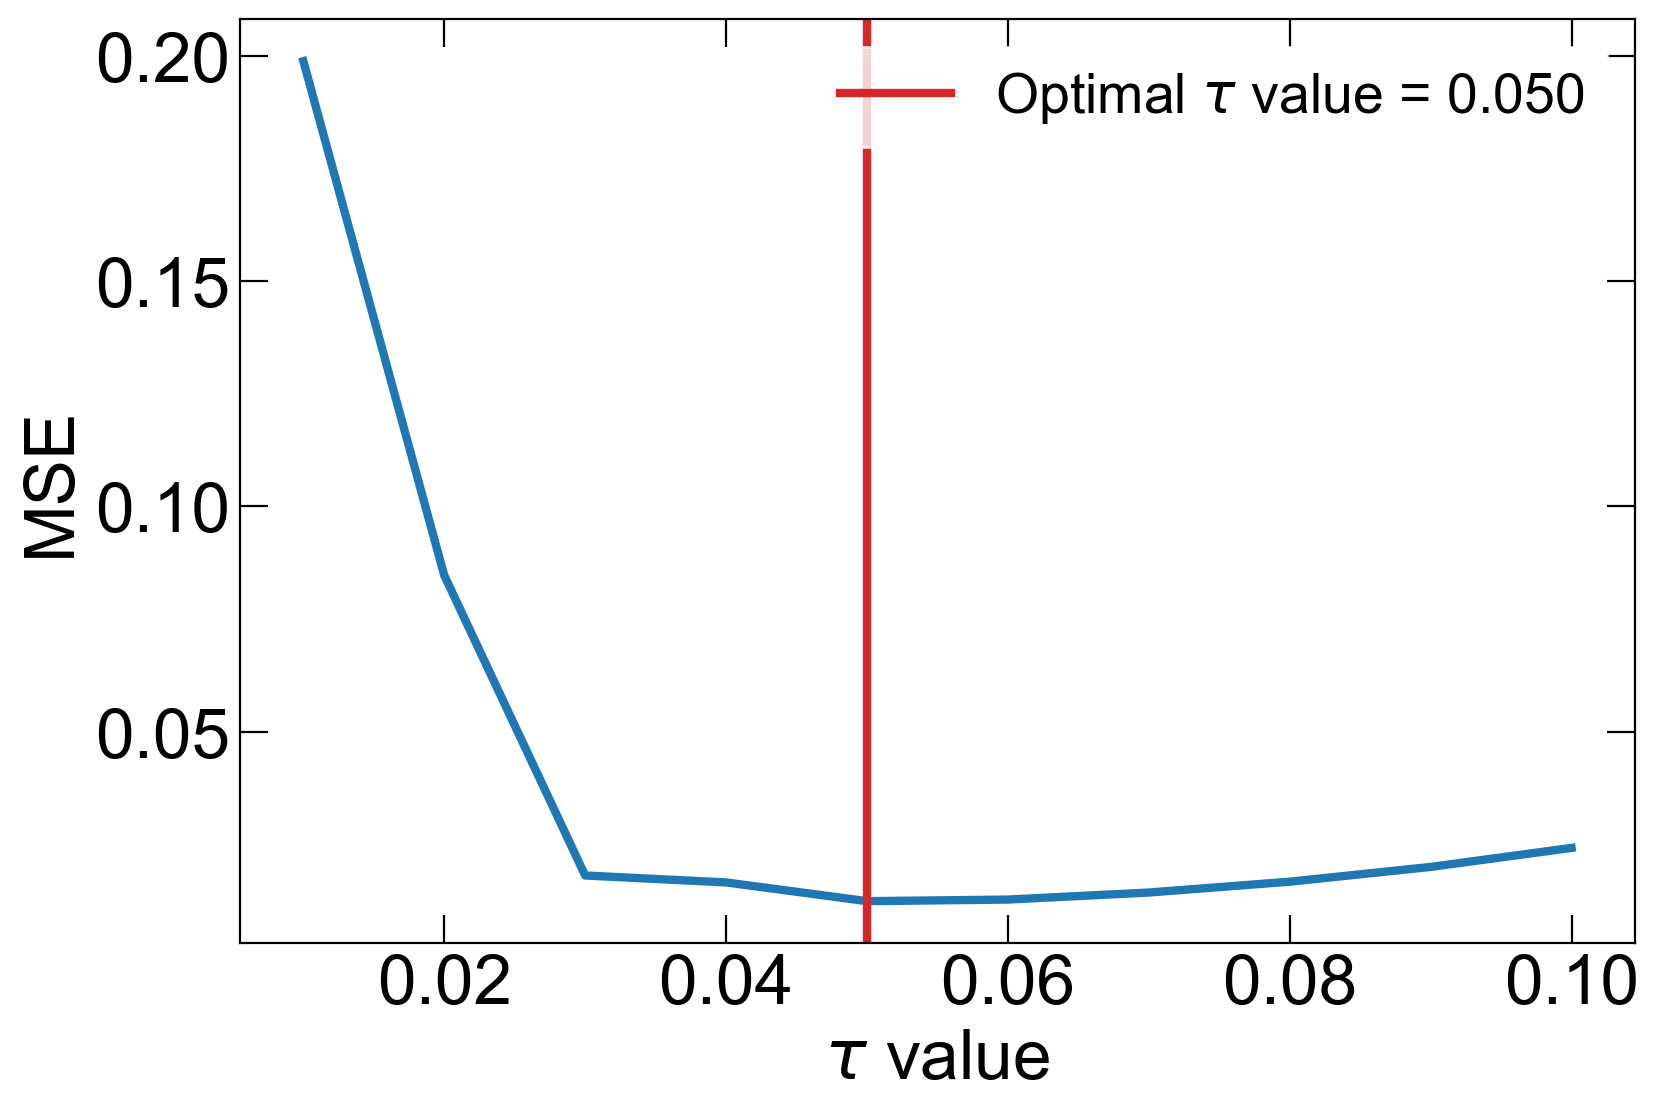

In [216]:
MSE_per_tau = np.array(MSE_per_tau)
optimal_tau = taus[np.argmin(MSE_per_tau)]

plt.plot(taus, MSE_per_tau)
plt.axvline(optimal_tau, color='tab:red', label=f'Optimal $\\tau$ value = {optimal_tau:.03f}')

plt.xlabel(r'$\tau$ value')
plt.ylabel('MSE')
plt.legend()

MSE for validation set is 0.01240007615047799 for optimal tau


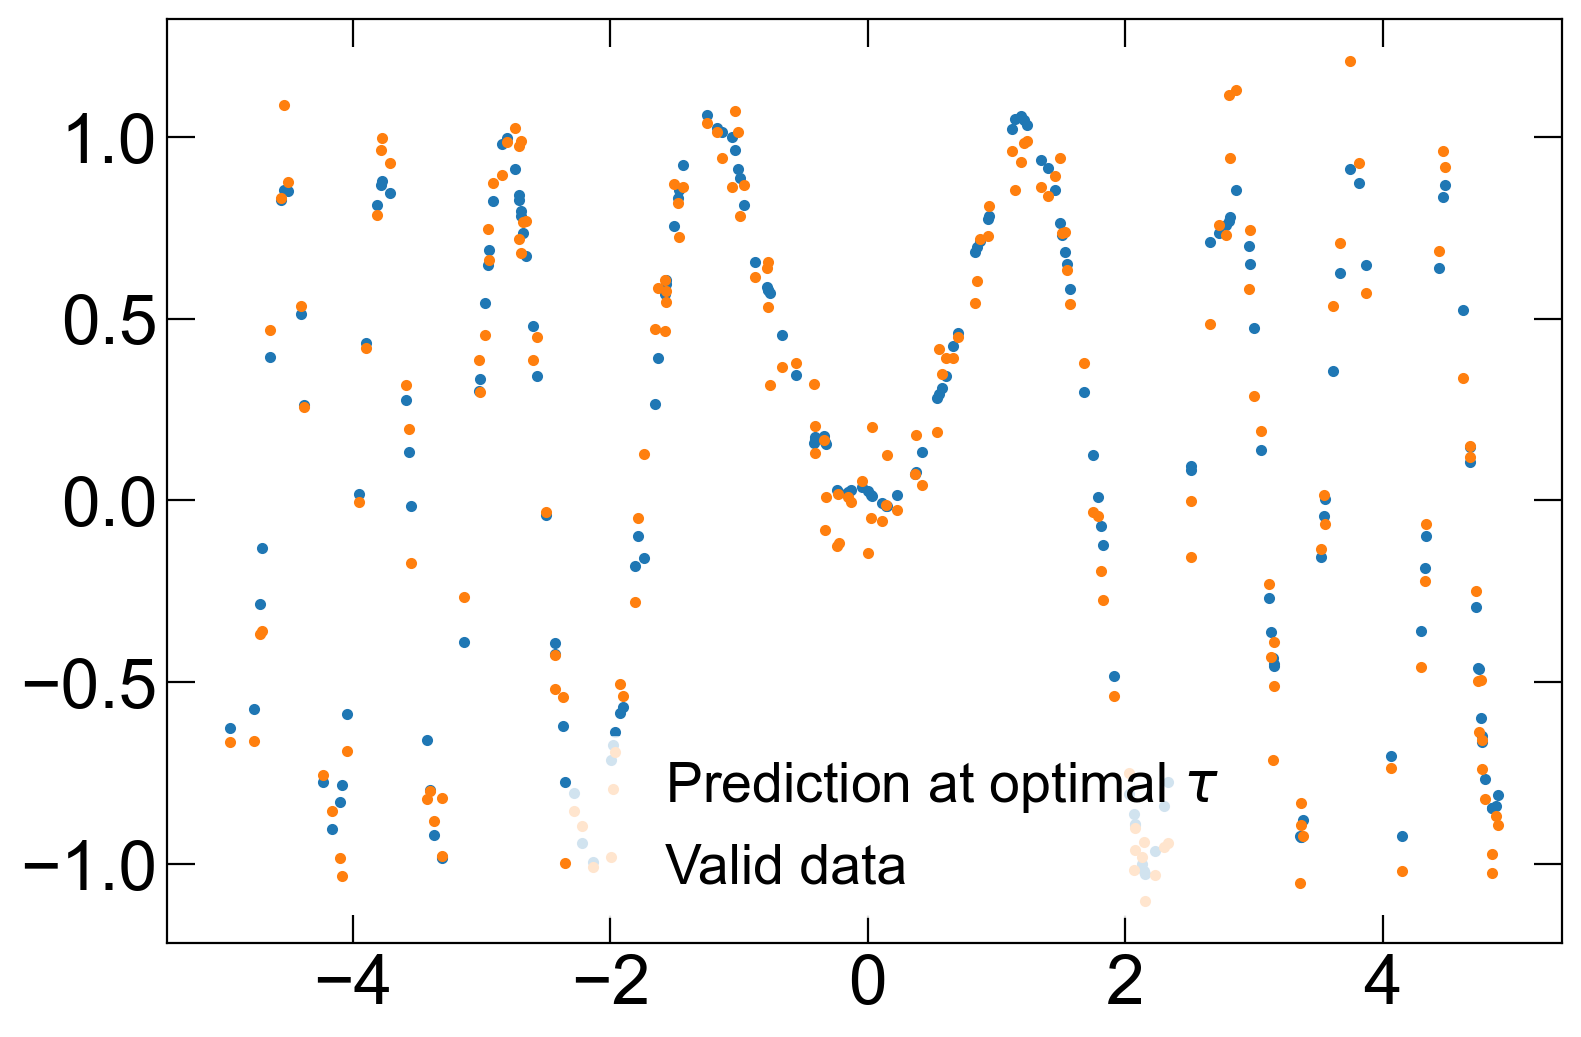

In [222]:
wlinreg = LocallyWeightedLinearRegression(tau=optimal_tau)
wlinreg.fit(x_train, y_train)
prediction_valid = wlinreg.predict(x_valid)

MSE = mean_squared_error(y_valid, prediction_valid)
print(f'MSE for validation set is {MSE} for optimal tau')

plt.plot(x_valid[:, 1], prediction_valid, marker='.', ls='', label=r'Prediction at optimal $\tau$')
plt.plot(x_valid[:, 1], y_valid, marker='.', ls='', label='Valid data')
plt.legend()

MSE for validation set is 0.016990143386822455 for optimal tau


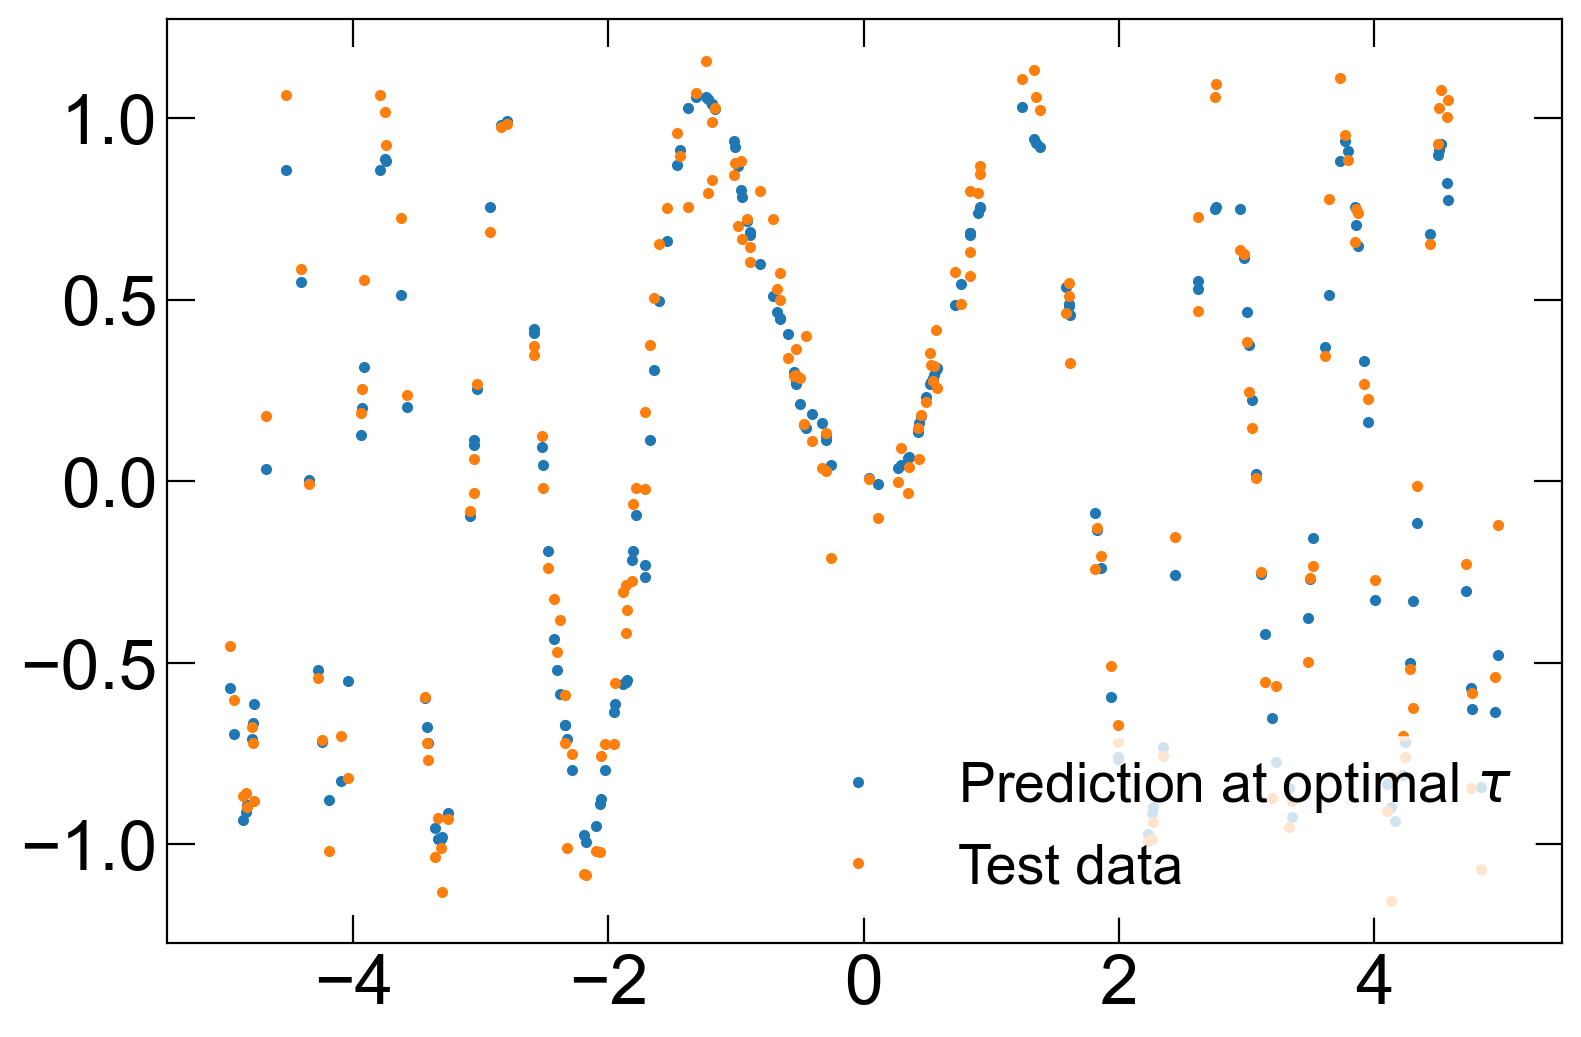

In [224]:
x_test, y_test = util.load_dataset("data/ds5_test.csv", add_intercept=True)

prediction_test = wlinreg.predict(x_test)

MSE = mean_squared_error(y_test, prediction_test)
print(f'MSE for validation set is {MSE} for optimal tau')

plt.plot(x_test[:, 1], prediction_test, marker='.', ls='', label=r'Prediction at optimal $\tau$')
plt.plot(x_test[:, 1], y_test, marker='.', ls='', label='Test data')
plt.legend()